In [327]:
ls

 Volume in drive D is Data
 Volume Serial Number is 6001-5F61

 Directory of D:\OMSCS\Machine learning\ML-project\panchal

09/12/2023  05:31 PM    <DIR>          .
09/05/2023  08:45 PM    <DIR>          ..
09/12/2023  05:31 PM    <DIR>          .ipynb_checkpoints
09/04/2023  07:39 PM               162 ~$cumentation.docx
09/04/2023  07:39 PM            31,135 ~WRL0407.tmp
09/04/2023  07:39 PM    <DIR>          chess_king_rook_vs_king
09/04/2023  07:39 PM            76,389 chess+king+rook+vs+king.zip
09/11/2023  11:51 PM         2,993,721 dataset_1.pickle
09/11/2023  11:51 PM         4,057,059 dataset_2.pickle
09/05/2023  08:45 PM            79,717 documentation.docx
09/04/2023  07:39 PM    <DIR>          occupancy_detection
09/04/2023  07:39 PM           335,713 occupancy+detection.zip
09/12/2023  05:30 PM           953,715 primary_assignment1.ipynb
09/04/2023  07:39 PM                22 README.md
               9 File(s)      8,527,633 bytes
               5 Dir(s)  700,071,665,664 byt

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearnex import patch_sklearn,config_context
#patch_sklearn()


# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import learning_curve
#from sklearn.metrics import log_loss
from time import time

import pickle
from sklearn.model_selection import GridSearchCV as GS
from sklearn.ensemble import AdaBoostClassifier


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


from sklearn.neighbors import KNeighborsClassifier

In [136]:
import plotly.express as px

# 1. Loading Data

In [259]:
plt.rc('font',size=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

In [137]:
#dataset module
class data_set_module(object):
    def __init__(self,train_data=None,test_data=None,feature_cols=None,target=None, load_data=False, address='', name ='random'):
        
        
        if load_data:
            #try:
            self.load(address,name)
            #except Exception as e:
                #print(e)
        else:        
                
            
            self.X_train = train_data[feature_cols] # Features
            self.y_train = train_data[target] # Target variable

            self.X_test = test_data[feature_cols] # Features
            self.y_test = test_data[target] # Target variable
            self.name = name
            self.address = address
            self.ADA = dict({})
    
    def load(self,address,name):
        
            object_ = self.load_pickle(loc=address)
            #self.__dict__ = {**self.__dict__ , **object_.__dict__}
            
            for i,j in object_.__dict__.items():
                print(i)
                setattr(self, i, j)
            
            
            
            
            if not hasattr(self,'name'):
                self.name = name
            if not hasattr(self,'address'):
                self.address = address   
                
    def save(self):
        self.save_pickle(self,self.address)
        
    def save_pickle(self,ob,loc=''):
    
        with open(loc, 'wb+') as fh:
            pickle.dump(ob, fh)
        
    
    
    def load_pickle(self,loc='') :   
        with open(loc, 'rb+') as fh:
            ob = pickle.load( fh)

        return ob
    

### Learning Curve

## - Dataset1

In [109]:
#data_1_wine_qt.quality.unique()

data_1_wine_qt[['quality_cat']].groupby('quality_cat').quality_cat.count()*100/data_1_wine_qt.shape[0]


quality_cat
0.0    36.701222
1.0    63.298778
Name: quality_cat, dtype: float64

In [91]:
data_1_wine_qt = pd.read_csv(r'data/WineQT_2.csv')#,header=None)
print(' \n - Features of data set 1 : wine quality \n')
display(data_1_wine_qt.columns)

print(' \n - Shape of the dataframe: \n',data_1_wine_qt.shape)
print(' \n - checking missing values \n')
display(data_1_wine_qt.apply(lambda x: x.isna().sum(), axis =0))
data_1_wine_qt = data_1_wine_qt.dropna()
print(' \n - After dropping missing value \n')
display(data_1_wine_qt.apply(lambda x: x.isna().sum(), axis =0))


 
 - Features of data set 1 : wine quality 



Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

 
 - Shape of the dataframe: 
 (6497, 13)
 
 - checking missing values 



type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

 
 - After dropping missing value 



type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [92]:
print('- checking number feature type\n')
data_1_wine_qt.info()

print('\n- creating an identifier for wine quality\n')
data_1_wine_qt['quality_cat'] = (data_1_wine_qt['quality'] >5).astype(float)

print('\n- converting wine type to a dummy boolian as there are only two possible values\n')
data_1_wine_qt['type'] = (data_1_wine_qt['type'].isin(['white'])).astype(float)

print('\n- checking summary\n')
display(data_1_wine_qt.describe().T)


- checking number feature type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB

- creating an identifier for w

,count,mean,std,min,25%,50%,75%,max
type,6463.0,0.753520,0.430995,0.00000,1.00000,1.00000,1.000,1.00000
fixed acidity,6463.0,7.217755,1.297913,3.80000,6.40000,7.00000,7.700,15.90000
volatile acidity,6463.0,0.339589,0.164639,0.08000,0.23000,0.29000,0.400,1.58000
citric acid,6463.0,0.318758,0.145252,0.00000,0.25000,0.31000,0.390,1.66000
residual sugar,6463.0,5.443958,4.756852,0.60000,1.80000,3.00000,8.100,65.80000
chlorides,6463.0,0.056056,0.035076,0.00900,0.03800,0.04700,0.065,0.61100
free sulfur dioxide,6463.0,30.516865,17.758815,1.00000,17.00000,29.00000,41.000,289.00000
total sulfur dioxide,6463.0,115.694492,56.526736,6.00000,77.00000,118.00000,156.000,440.00000
density,6463.0,0.994698,0.003001,0.98711,0.99233,0.99489,0.997,1.03898
pH,6463.0,3.218332,0.160650,2.72000,3.11000,3.21000,3.320,4.01000


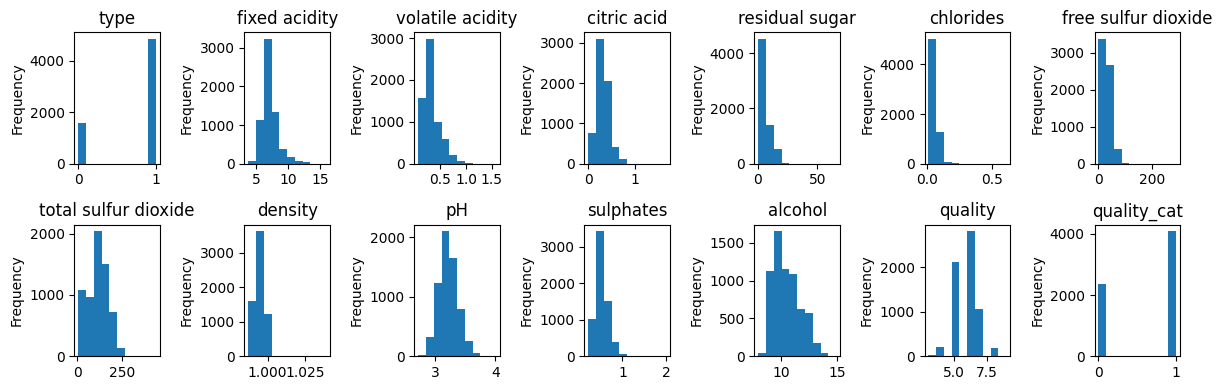

In [127]:
num_cols = len(data_1_wine_qt.columns)
num_rows = (num_cols + 1) // 2  # Two columns of plots

# Create a new figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=num_rows, figsize=(12, 4))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through each column and plot its distribution
for i, column in enumerate(data_1_wine_qt.columns):
    ax = axes[i]
    data_1_wine_qt[column].plot(kind='hist', ax=ax, title=column)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_cols])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

save_loss_curve(fig,'data_1_summary')

In [113]:
data_1_wine_qt.astype(float).corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
type,1.000000,-0.488552,-0.653374,0.185892,0.349358,-0.512705,0.472653,0.700521,-0.391437,-0.328474,-0.486715,0.035095,0.119185,0.117207
fixed acidity,-0.488552,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174,-0.067004
volatile acidity,-0.653374,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677,-0.268071
citric acid,0.185892,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926,0.075442
residual sugar,0.349358,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654,-0.030123
chlorides,-0.512705,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553,-0.182352
free sulfur dioxide,0.472653,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924,0.044354
total sulfur dioxide,0.700521,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598,-0.047390
density,-0.391437,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447,-0.267802
pH,-0.328474,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403,0.017713


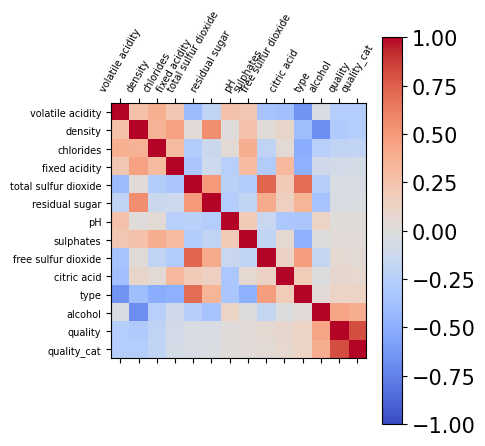

In [263]:
#data_1_wine_qt.corr()

fig = plt.figure(figsize = [5,5])




corr_d1 = data_1_wine_qt.astype(float).corr().loc[data_1_wine_qt.astype(float).corr().quality_cat.sort_values().index.values,
                                        data_1_wine_qt.astype(float).corr().quality_cat.sort_values().index.values]

plt.matshow(corr_d1, cmap='coolwarm', fignum=0,vmin=-1, vmax=1)

# Customize the heatmap
plt.colorbar()  # Add a color bar
plt.xticks(range(len(corr_d1.columns)), corr_d1.columns, rotation=60,fontsize =7)
plt.yticks(range(len(corr_d1.columns)), corr_d1.columns,fontsize =7)

# Adjust layout
plt.tight_layout()
# Display the plot
plt.show()

#fig = save_loss_curve(fig,'data_1_summary_corr')

In [27]:

data_1_splitter = int(np.ceil(data_1_wine_qt.shape[0]*0.8))

data_1_training, data_1_test = data_1_wine_qt.iloc[:data_1_splitter,:], data_1_wine_qt.iloc[data_1_splitter:,:]


data_1_feature_cols =['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


#data_1_feature_cols =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol']


data_1_target = 'quality_cat'


dataset_1 = data_set_module(train_data=data_1_training,test_data=data_1_test,
                            feature_cols=data_1_feature_cols, target=data_1_target,
                            address='./dataset_1.pickle', name ='dataset_1')



In [28]:
dataset_1.save()

In [138]:
#load_dataset_1
dataset_1 = data_set_module(load_data=True, address='./dataset_1.pickle', name ='dataset_1')


X_train
y_train
X_test
y_test
name
address
ADA


In [139]:
dataset_1.ADA.keys()

dict_keys(['DT', 'Adaboost_DT', 'SVC', 'KNN', 'NN_test'])

In [21]:
#from copy import deepcopy
#
#dataset_1_v2 = deepcopy(dataset_1)
#dataset_2_v2 = deepcopy(dataset_2)

In [23]:
#del dataset_1_v2.ADA['SVC']

In [25]:
# del dataset_2_v2.ADA['SVC']
# dataset_2_v2.ADA.keys()

dict_keys(['DT', 'Adaboost_DT'])

In [26]:
# dataset_1_v2.save_pickle(dataset_1_v2,loc='dataset_1_v2.pkl')
# dataset_2_v2.save_pickle(dataset_2_v2,loc='dataset_2_v2.pkl')



## - Dataset2

In [140]:
#load_dataset_2
dataset_2 = data_set_module(load_data=True, address='./dataset_2_v2.pickle', name ='dataset_2_v2')

X_train
y_train
X_test
y_test
name
address
ADA


In [ ]:
#save_pickle(dataset_1,'./dataset_1.pickle')
#save_pickle(dataset_2,'./dataset_2.pickle')

In [121]:
#https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset
data_2_gender = pd.read_csv('data/gender_classification_v7.csv')
display('\nfeatures',data_2_gender.columns )
display('\nrecord_shape',data_2_gender.shape)
print('\n- check for missing data values\n')
display(data_2_gender.apply(lambda x: x.isna().sum(), axis =0),data_2_gender.shape)
print('\n -no missing data found\n')

'\nfeatures'

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

'\nrecord_shape'

(5001, 8)


- check for missing data values



long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

(5001, 8)


 -no missing data found



In [122]:
#converting gender to boolean, male =1
data_2_gender['gender']  = (data_2_gender['gender'] == 'Male').astype(float)

In [123]:
print('- checking number feature type\n')
data_2_gender.info()

print('\n- checking summary\n')
display(data_2_gender.describe().T)


- checking number feature type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 312.7 KB

- checking summary



,count,mean,std,min,25%,50%,75%,max
long_hair,5001.0,0.869626,0.336748,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,5001.0,13.181484,1.107128,11.4,12.2,13.1,14.0,15.5
forehead_height_cm,5001.0,5.946311,0.541268,5.1,5.5,5.9,6.4,7.1
nose_wide,5001.0,0.493901,0.500013,0.0,0.0,0.0,1.0,1.0
nose_long,5001.0,0.507898,0.499988,0.0,0.0,1.0,1.0,1.0
lips_thin,5001.0,0.493101,0.500002,0.0,0.0,0.0,1.0,1.0
distance_nose_to_lip_long,5001.0,0.498900,0.500049,0.0,0.0,0.0,1.0,1.0
gender,5001.0,0.499900,0.500050,0.0,0.0,0.0,1.0,1.0


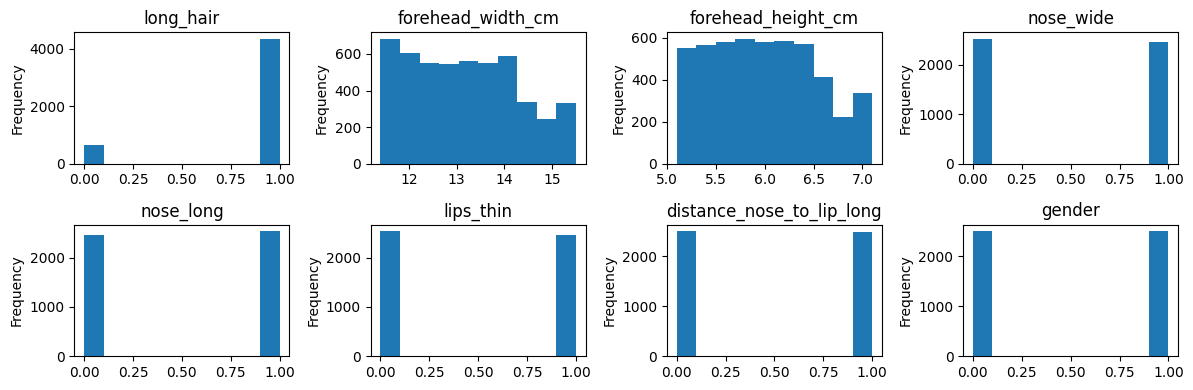

In [125]:
num_cols = len(data_2_gender.columns)
num_rows = (num_cols + 1) // 2  # Two columns of plots

# Create a new figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=num_rows, figsize=(12, 4))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through each column and plot its distribution
for i, column in enumerate(data_2_gender.columns):
    ax = axes[i]
    data_2_gender[column].plot(kind='hist', ax=ax, title=column)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_cols])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

save_loss_curve(fig,'data_2_summary')

In [132]:
data_2_gender.astype(float).corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,0.754850
gender,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,1.000000


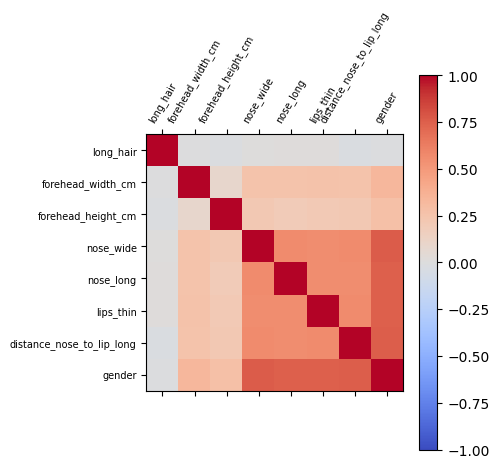

In [130]:
#data_1_wine_qt.corr()

fig = plt.figure(figsize = [5,5])

plt.matshow(data_2_gender.astype(float).corr(), cmap='coolwarm', fignum=0,vmin=-1, vmax=1)

# Customize the heatmap
plt.colorbar()  # Add a color bar
plt.xticks(range(len(data_2_gender.columns)), data_2_gender.columns, rotation=60,fontsize =7)
plt.yticks(range(len(data_2_gender.columns)), data_2_gender.columns,fontsize =7)

# Adjust layout
plt.tight_layout()
# Display the plot
plt.show()

fig = save_loss_curve(fig,'data_2_summary_corr')

In [118]:


#split dataset in features and target variable
#data_2_feature_cols = [ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
#       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
#data_2_target = 'Potability'
#

data_2_feature_cols = [ 'long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
data_2_target = 'gender'

data_2_splitter = int(np.ceil(data_2_gender.shape[0]*0.8))

data_2_training, data_2_test = data_2_gender.iloc[:data_2_splitter,:], data_2_gender.iloc[data_2_splitter:,:]



Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

(5001, 8)

C:\Users\ashup\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

(5001, 8)

In [139]:

dataset_2 = data_set_module(train_data=data_2_training,
                            test_data=data_2_test,feature_cols=data_2_feature_cols,
                            target=data_2_target, address='./dataset_2_v2.pickle', name ='dataset_2_v2')


dataset_2.save()
#X_test2 = data_2_datatest2[feature_cols] # Features
#y_test2 = data_2_datatest2.Occupancy # Target variable



In [93]:
#for j, k in dataset_3.items():
#    setattr(dataset_2,j,k)


# 2. Models

### Loss Curve

In [141]:
def loss_curve( X_train,y_train,parameters,model,GS=GS, GS_params = dict(
                                                            cv = 5 ,
                                                            n_jobs = -1,
                                                            scoring = 'roc_auc',
                                                            return_train_score=True
                                                        ),algorithm='random'
                                                                      ,data_set='random',
              
              plot_config = dict(marker= '.',logx =False),misc =''
              
              ,ylim=[dict(ymax=None,ymin=None)], save = True
              ):
    
    
    GS_list = dict({})
    dataframe_list = dict({})
    
    fig,ax = plt.subplots(1,len(parameters),figsize = ([7,4]
                          if len(parameters) == 1 else [15,7.5/len(parameters)])
                         
                         
                         )
    
    return_records = dict({})
    
    
    over_all_title = ('Loss Curve-'+algorithm+' - '+ data_set+'-'+GS_params['scoring']+misc)
    
    if len(ylim) != len(parameters):
        ylim = [ylim[0] for i in range(len(parameters))]
    
    
    for ax_c,i in enumerate(parameters):
        
        #print(j)
        
        j = list(i.keys())[0]
        #print(i)
        clf = GS(model, i, **GS_params)#'neg_log_loss')
        
        clf.fit(X_train, y_train)
        GS_list[j] = clf
        
        
        
        
        return_records[j] = {'best_estimator':clf.best_estimator_,
                             'best_score':clf.best_score_    ,
                             'best_params':clf.best_params_
            
                            }
        
        
        
        
        print(j,{'best_score':clf.best_score_ , 
                    'best_params':clf.best_params_}, misc)
        dataframe_list[j] = pd.DataFrame(
            {'mean_train_score':clf.cv_results_['mean_train_score'],
             'mean_CV_score':clf.cv_results_['mean_test_score'],

             j:clf.param_grid[j]
            }).set_index(j)
        
        if len(parameters) == 1:
            sel_ax = ax
            y_lim_selected = ylim[0]
        else:
            sel_ax = ax[ax_c]
            y_lim_selected = ylim[ax_c]
        dataframe_list[j].plot(**plot_config,ax=sel_ax)
        title = ('Loss Curve|'+algorithm+' - '+ data_set+'\n'+GS_params['scoring']+' - '+j+'-'+misc)
        sel_ax.set_title(title,size=10)
        
        sel_ax.set_ylabel(GS_params['scoring'])
        
        sel_ax.set_ylim(**y_lim_selected)
        
        print(clf.best_params_)
        
        
        if np.char.isnumeric(str(clf.best_params_[j])) or ( type(clf.best_params_[j]) in [float,int,np.float64,np.float32,np.int32,np.int64]):
        
            sel_ax.axvline(x=(clf.best_params_[j]
                           
                           #if np.char.isnumeric(str(clf.best_params_[j]))
                           #else str(clf.best_params_[j])
                         )
                       
                       
                       
                       , color='grey', ls='--', lw=1,label='best estimator')

        # multiple lines all full height
        #plt.vlines(x=[37, 37.25, 37.5], ymin=0, ymax=len(xs), colors='purple', ls='--', lw=2, label='vline_multiple - full height')

    if save:
        save_loss_curve(fig,over_all_title)
        
        
        
        
        
    return return_records, GS_list, dataframe_list





    
    

In [235]:
def save_loss_curve(ax,title):
    
    ax.savefig(r'figure/'+title+'.png', bbox_inches='tight')

In [178]:
#learning_curve??

np.char.isnumeric(str((1,2)))

array(False)

In [142]:
learning_curve_config = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=-1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        #random_state = 1
                            )





def plot_learning_curve(X,y,model,
                        learning_curve_config=dict(cv=10, 
                            train_sizes=np.linspace(0.1, 1.0, 500),
                         n_jobs=-1,return_times =True,shuffle=True,

                        random_state = 1)
                       , algorithm='random',data_set='random',
                       plot_config=dict(logx =False)
                       
                       ,misc =''
                       ,ylim=dict(ymax=0.25,ymin=-6), save = True,random_state=1
                       ):
    

    (train_sizes, train_scores, test_scores,fit_times,
     _) = learning_curve(estimator=model,
                                        X=X,
                                       y=y,
                                   **learning_curve_config
                                    #exploit_incremental_learning=True

                                )
    fig,(ax1,ax2) = plt.subplots(1,2,figsize = [15,3.25])
    
    learning_curve_table = pd.DataFrame(
        dict(train_sizes=train_sizes,
             mean_train_score=train_scores.mean(axis =1),
             Std_train_score=train_scores.std(axis =1),
             Max_train_score=train_scores.max(axis =1),
             Min_train_score=train_scores.min(axis =1),
             mean_validation_scores=test_scores.mean(axis =1),
             Std_validation_scores=test_scores.std(axis =1),
             Max_validation_scores=test_scores.max(axis =1),
             Min_validation_scores=test_scores.min(axis =1),
             mean_fit_times=fit_times.mean(axis =1),
             #Std_fit_times=fit_times.std(axis =1)
             
            ))
    
    learning_curve_table.set_index('train_sizes'
                                  )[['mean_train_score',
                                     'mean_validation_scores']].plot(
        
        **plot_config,ax=ax1,marker='.')
        
    ax1.set_title('Learning Curve|'+algorithm+' - '+ data_set+'\n'+
                  learning_curve_config['scoring']+'- steps'+misc)

    ax1.set_ylabel(learning_curve_config['scoring'])
    
    ax1.fill_between(
    learning_curve_table['train_sizes'], 
        learning_curve_table['Max_train_score'],
        learning_curve_table['mean_train_score']-learning_curve_table['Std_train_score'], 
        where=(learning_curve_table['Max_train_score'] >
               learning_curve_table['Min_train_score']), 
    interpolate=True, color=u'#1f77b4', alpha=0.25, 
    #label="Positive"
    )
    
    ax1.fill_between(
    learning_curve_table['train_sizes'], 
        learning_curve_table['Max_validation_scores'], 
        learning_curve_table['mean_validation_scores']-learning_curve_table['Std_validation_scores'], 
         
        where=(learning_curve_table['Max_validation_scores'] >
               learning_curve_table['Min_validation_scores']), 
    interpolate=True, color=u'#ff7f0e', alpha=0.25, 
    #label="Positive"
    )
    
    
    
    learning_curve_table.plot(
        
        x='mean_fit_times',y='mean_train_score',
        **plot_config,ax=ax2,kind='scatter', 
        color=u'#1f77b4', label='Avg Train Score')
    
    learning_curve_table.plot(
        
        x='mean_fit_times',y='mean_validation_scores',
        **plot_config,ax=ax2,kind='scatter',
        color=u'#ff7f0e', label='Avg Validation Score')
    

    
    ax2.set_title('Learning Curve|'+algorithm+' - '+ data_set+'\n'+
                  learning_curve_config['scoring']+'- Time'+misc,size =10)

    ax2.set_ylabel(learning_curve_config['scoring'])    
    
    #specify x-axis and y-axis labels
    ax2.set_xlabel('Fit Time')
    
    
    
    ax1.set_ylim(**ylim)
    ax2.set_ylim(**ylim)
    
    over_all_title = ('Learning Curve-'+algorithm+' - '+ data_set+'-'+
                  learning_curve_config['scoring']+'-'+misc)    
    
    if save:
        save_loss_curve(fig,over_all_title)
    
    
    
    return {'learning_df' : learning_curve_table, 
            'plt':(fig,(ax1,ax2))}

In [165]:
#GS??

In [143]:
def GS_get_best_estimator(X_train,y_train,parameters,model,GS=GS, GS_params = dict(
                                                            cv = 5 ,
                                                            n_jobs = -1,
                                                            scoring = 'roc_auc',
                                                            return_train_score=True
                                                        )
                         ):
    
        clf = GS(model, parameters, **GS_params)
        clf.fit(X_train, y_train)
        
        print({'best_score':clf.best_score_ , 
                    'best_params':clf.best_params_})
        return clf

## Decision Tree Algorithm

1. decison validation curves to identify the best parameters

we will study 2 pruning mechanism individually in decision tree and try to understand their effects 

In [ ]:
plt.rc('font',size=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

In [145]:
dataset_2.ADA['DT'] = dict({}) 

ccp_alpha {'best_score': -0.10659513847379762, 'best_params': {'ccp_alpha': 0.0008016032064128258}} 
{'ccp_alpha': 0.0008016032064128258}
max_depth {'best_score': -0.11161788340627163, 'best_params': {'max_depth': 4}} 
{'max_depth': 4}


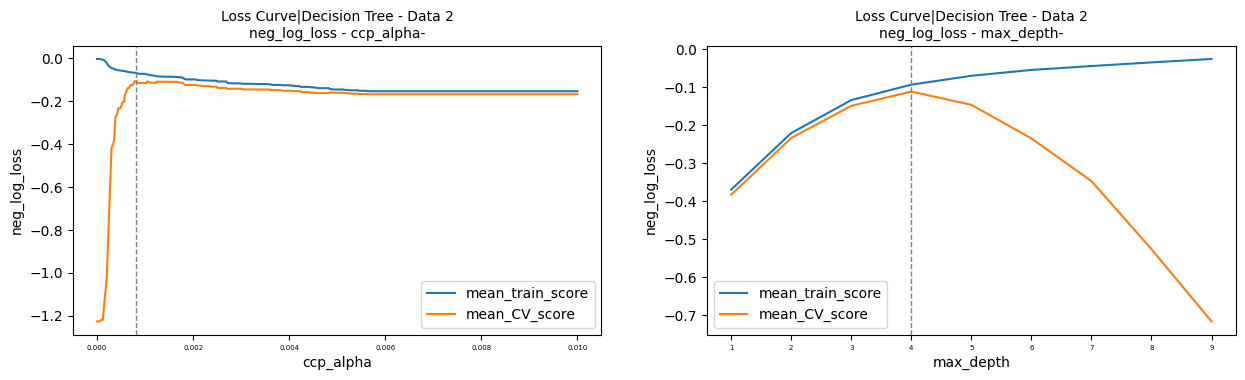

In [196]:
DT_2_config = [{'ccp_alpha' : np.linspace(0,0.01,500)},
               {'max_depth' : [1,2,3,4,5,6,7,8,9]},
                       
               #{'min_samples_split':np.arange(2,2000,40)}

               ]

DT_2_GS_params = dict(
                            cv = 5 ,
                            n_jobs = -1,
                            scoring = 'neg_log_loss',
                            return_train_score=True
                        )




dataset_2.ADA['DT']['loss_curve_GS'],dataset_2.ADA['DT']['GS_list'],dataset_2.ADA['DT']['DF_list'] = loss_curve(
                    
    
                GS=GS, model=DecisionTreeClassifier(random_state=1), X_train=dataset_2.X_train,y_train=dataset_2.y_train,
                                 algorithm='Decision Tree',data_set='Data 2',
           parameters =DT_2_config ,GS_params = DT_2_GS_params,
                                 
                                 plot_config = dict(logx =False),ylim=[dict(ymax=None,ymin=None),
                                                                       dict(ymax=None,ymin=None)]
                                 
          )    

In [152]:
#dataset_2.ADA['DT']['GS_list']['ccp_alpha']

In [167]:

DT_2_config_all = {'ccp_alpha' : np.linspace(0,0.01,200),'max_depth' : [1,2,3,4,5,6,7,8,9]},
                       
               #{'min_samples_split':np.arange(2,2000,40)}

               


dataset_2.ADA['DT']['best_model_whole_data'] = GS_get_best_estimator(GS=GS, 
                        model=DecisionTreeClassifier(random_state=1), X_train=dataset_2.X_train,y_train=dataset_2.y_train,
           parameters =DT_2_config_all,GS_params =DT_2_GS_params
          )    

{'best_score': -0.1058051326116082, 'best_params': {'ccp_alpha': 0.0008040201005025126, 'max_depth': 9}}


In [157]:
dataset_2.save()

In [29]:
dataset_1.ADA['DT'] = dict({})   

ccp_alpha {'best_score': -0.5330703287900159, 'best_params': {'ccp_alpha': 0.0026549098196392783}} 
{'ccp_alpha': 0.0026549098196392783}
max_depth {'best_score': -0.5319424044245202, 'best_params': {'max_depth': 4}} 
{'max_depth': 4}


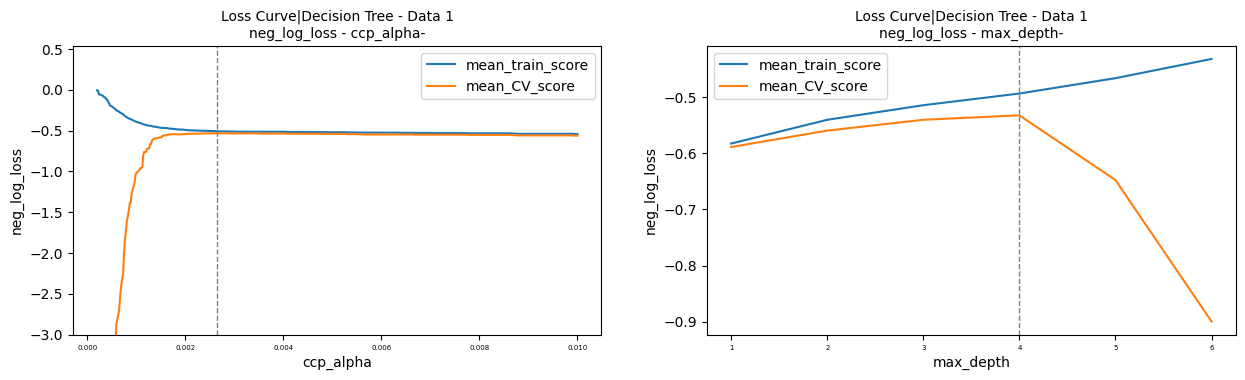

In [195]:
DT_1_config = [{'ccp_alpha' : np.linspace(0.0002,0.01,500)},
               {'max_depth' : [1,2,3,4,5,6]},
                       
               #{'min_samples_split':np.arange(2,2000,40)}

               ]

DT_1_GS_params = dict(
                            cv = 5 ,
                            n_jobs = -1,
                            scoring = 'neg_log_loss',
                            return_train_score=True
                        )

dataset_1.ADA['DT']['loss_curve_GS'],dataset_1.ADA['DT']['GS_list'],dataset_1.ADA['DT']['DF_list'] = loss_curve(
                    
    
                GS=GS, model=DecisionTreeClassifier(random_state=1), 
    X_train=dataset_1.X_train,y_train=dataset_1.y_train,
                                 algorithm='Decision Tree',data_set='Data 1',
           parameters =DT_1_config ,GS_params = DT_1_GS_params,
                                 
                                 plot_config = dict(logx =False),ylim=[dict(ymax=None,ymin=-3),
                                                                       dict(ymax=None,ymin=None)]
                                 
          )    

In [31]:

DT_1_config_all = {'ccp_alpha' : np.linspace(0.0002,0.02,200),'max_depth' : [1,2,3,4,5,6]}
                       
               #{'min_samples_split':np.arange(2,2000,40)}

               




dataset_1.ADA['DT']['best_model_whole_data'] = GS_get_best_estimator(GS=GS, 
                        model=DecisionTreeClassifier(random_state=1),
                                X_train=dataset_1.X_train,
                                y_train=dataset_1.y_train,
           parameters =DT_1_config_all,GS_params = DT_1_GS_params
                                                 
                                                 
                                                 
                       
                       
          )    

{'best_score': -0.5319424044245202, 'best_params': {'ccp_alpha': 0.0002, 'max_depth': 4}}


In [ ]:
import pickle

In [106]:
dataset_1.save()
dataset_2.save()

In [270]:
#plt.errorbar??

In [107]:
#dataset_1.save_pickle(dataset_1,dataset_1.address)
#dataset_2.save_pickle(dataset_2,dataset_2.address)

In [34]:
dataset_1.save()

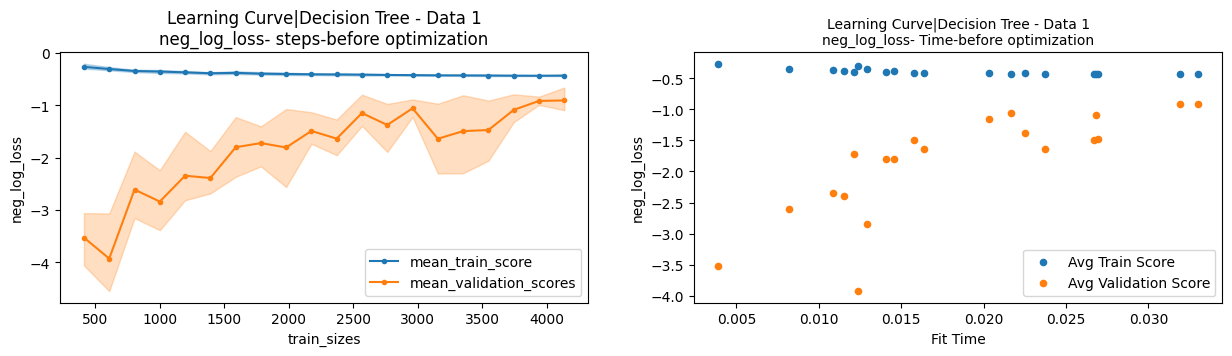

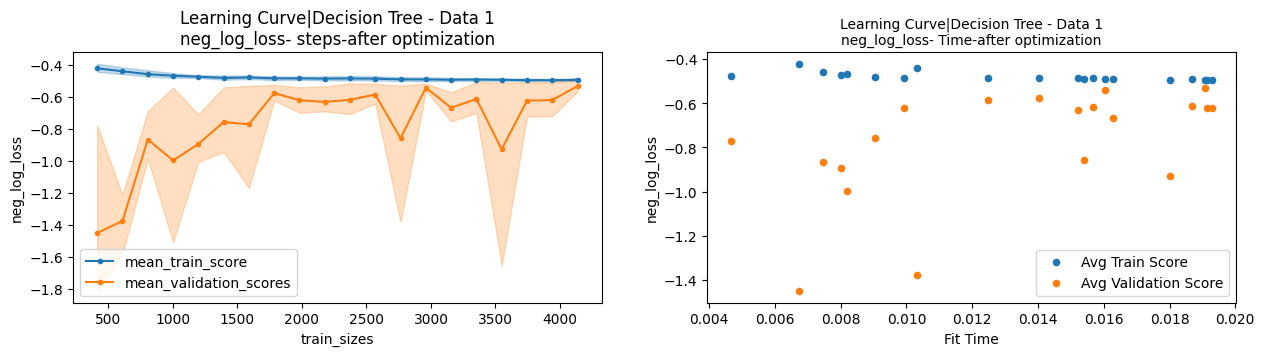

In [33]:
DT_1_config_before_optim = {'ccp_alpha' : 0.00001,'max_depth' : 6 }

learning_curve_config_DT = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=-1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)

dataset_1.ADA['DT']['learning_curve'] = {
    
    
    
                'bf_opt':plot_learning_curve( X=dataset_1.X_train,
                     y=dataset_1.y_train, 
                    model = DecisionTreeClassifier(**DT_1_config_before_optim,random_state=1),
                    learning_curve_config=learning_curve_config_DT,
                    algorithm='Decision Tree',
                    data_set='Data 1',misc ='-before optimization',ylim=dict(ymax=None,ymin=None)
                   ),
    
                'af_opt': plot_learning_curve( X=dataset_1.X_train,
                     y=dataset_1.y_train, 
                    model = DecisionTreeClassifier(**dataset_1.ADA['DT'][
                'best_model_whole_data'].best_params_,random_state=1
                                                    ),
                    learning_curve_config=learning_curve_config_DT,
                    algorithm='Decision Tree',
                    data_set='Data 1',misc ='-after optimization',ylim=dict(ymax=None,ymin=None)
                   )
    
    
                    }

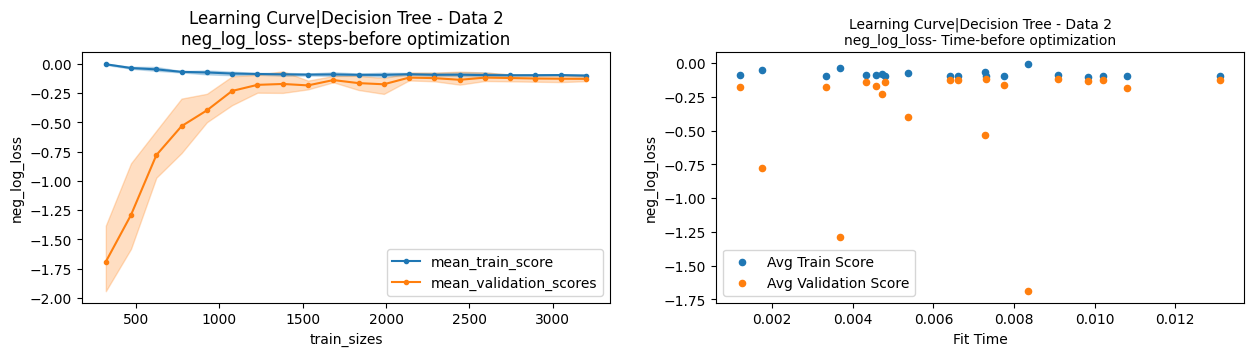

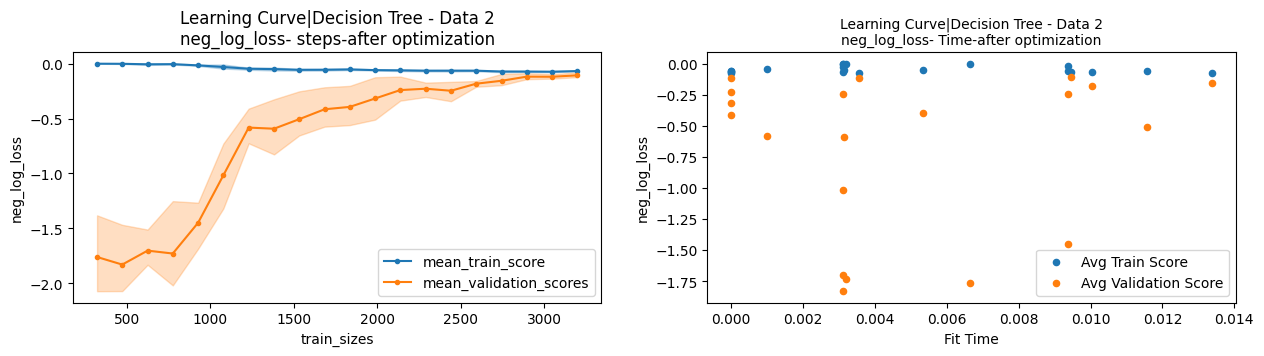

In [173]:
DT_2_config_before_optim = {'ccp_alpha' : 0.002,'max_depth' : 9 }

learning_curve_config_DT = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=-1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)




dataset_2.ADA['DT']['learning_curve'] = {
    
                'bf_opt':plot_learning_curve( X=dataset_2.X_train,
                     y=dataset_2.y_train, 
                    model = DecisionTreeClassifier(**DT_2_config_before_optim,random_state=1),
                    learning_curve_config=learning_curve_config_DT,
                    algorithm='Decision Tree',
                    data_set='Data 2',misc ='-before optimization',ylim=dict(ymax=None,ymin=None)
                   ),
    
                'af_opt': plot_learning_curve( X=dataset_2.X_train,
                     y=dataset_2.y_train, 
                    model = DecisionTreeClassifier(**dataset_2.ADA['DT'][
                'best_model_whole_data'].best_params_,random_state=1
                                                    ),
                    learning_curve_config=learning_curve_config_DT,
                    algorithm='Decision Tree',
                    data_set='Data 2',misc ='-after optimization',ylim=dict(ymax=None,ymin=None)
                   )
    
    
                    }

In [174]:
dataset_1.save()
dataset_2.save()

### Misc

## Neural network

In [309]:
#dir(nn)

In [112]:
"""
A simple walkthrough of how to code a fully connected neural network
using the PyTorch library. For demonstration we train it on the very
common MNIST dataset of handwritten digits. In this code we go through
how to create the network as well as initialize a loss function, optimizer,
check accuracy and more.

Programmed by Aladdin Persson
* 2020-04-08: Initial coding
* 2021-03-24: Added more detailed comments also removed part of
              check_accuracy which would only work specifically on MNIST.
* 2022-09-23: Updated with more detailed comments, docstrings to functions, and checked code still functions as intended.
"""

# Imports
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,Dataset
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!

# Here we create our simple neural network. For more details here we are subclassing and
# inheriting from nn.Module, this is the most general way to create your networks and
# allows for more flexibility. I encourage you to also check out nn.Sequential which
# would be easier to use in this scenario but I wanted to show you something that
# "always" works and is a general approach.
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        """
        Here we define the layers of the network. We create two fully connected layers

        Parameters:
            input_size: the size of the input, in this case 784 (28x28)
            num_classes: the number of classes we want to predict, in this case 10 (0-9)

        """
        super(NN, self).__init__()
        # Our first linear layer take input_size, in this case 784 nodes to 50
        # and our second linear layer takes 50 to the num_classes we have, in
        # this case 10.
        
        self.fc1 = nn.Linear(input_size, 32) #input layer
        
        self.fc2 = nn.Linear(32, 16) # hidden
        #self.fc3 = nn.Linear(4, 4) # hidden
        self.out = nn.Linear(16,1)#num_classes)
        #self.fc2 = nn.Linear(50, 50) # hidden 2
        self.output = nn.Softmax(dim=1)#(num_classes,dim=1)#nn.Sigmoid() # output

    def forward(self, x):
        """
        x here is the mnist images and we run it through fc1, fc2 that we created above.
        we also add a ReLU activation function in between and for that (since it has no parameters)
        I recommend using nn.functional (F)

        Parameters:
            x: mnist images

        Returns:
            out: the output of the network
        """

        x = F.relu(self.fc1(x))
        #x = self.sigmoid(x)
        x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        x = F.relu(self.out(x))
        x = self.output(x)
        return x


In [160]:
# Set device cuda for GPU if it's available otherwise run on the CPU






#define mydataset class to convert pandas dataframes and series into datasets
#https://androidkt.com/load-pandas-dataframe-using-dataset-and-dataloader-in-pytorch/#:~:text=We%20have%20to%20first%20create,the%20dataset%20item%20by%20item.
class MyDataset(Dataset):
 
    def __init__(self,x,y,device=None):

        self.x_train=torch.tensor(x.values,dtype=torch.float32,device=device)
        #self.y_train=torch.tensor(np.array([y.values,1-y.values]).T ,dtype=torch.float32#int64
        #                          ,device=device)
        
        
        self.y_train=torch.tensor(y#.values 
                                  ,dtype=torch.float32#int64
                                  ,device=device).reshape(-1, 1)
        
        #self.y_train=  torch.tensor(pd.get_dummies(y.values#.astype('category').to_frame()
        #                   ).values).to(device)
        
        
        
        
        
        
        
        #torch.Categorical(y.values).to(device = device)
 
    def __len__(self):
        return len(self.y_train)

    def __getitem__(self,idx):
        return self.x_train[idx],self.y_train[idx]



class nn_model_cls(object):
    
    def __init__(self, data,probem_param = dict({
    
                                            # Hyperparameters
                                           
                                            'learning_rate' : 0.01
                                            ,'batch_size' : 64
                                            ,'num_epochs' : 3

                                            }), device = 'cpu'

                
                ):
        
        self.device = device
        self.probem_param = probem_param
        
        
        self.X_train = data.X_train
        
        self.categories=data.y_test.unique()
        self.cat_train = pd.Categorical(data.y_train, categories=self.categories)
        self.y_train, self.uniques = pd.factorize(self.cat_train)

        
        
        
        #self.y_train = data.y_test #  torch.tensor(pd.get_dummies(data.y_train#.astype('category').to_frame()
                          # ).values).to(self.device)
        
        
        
        
        self.X_test  = data.X_test 
        #self.y_test  = data.y_test #.astype('category').to_frame()
        self.cat_test = pd.Categorical(data.y_test, categories=self.categories)
        self.y_test, self.uniques_2 = pd.factorize(self.cat_test)
        
        
        #create datasets and dataloaders

        self.func = lambda x: 0.9 if x ==1 else 0.1

        #train_dataset = MyDataset(X_train,y_train.apply(func),device=device)
        #test_dataset = MyDataset(X_test,y_test.apply(func),device=device)
        #test_2_dataset = MyDataset(X_test,y_test.apply(func),device=device)

        self.train_dataset = MyDataset(self.X_train,self.y_train,device=self.device)
        self.test_dataset = MyDataset(self.X_test,self.y_test,device=self.device)
        #test_2_dataset = MyDataset(X_test,y_test,device=device)

        # Load Data

        self.train_loader = DataLoader(dataset=self.train_dataset, batch_size=self.probem_param['batch_size'], shuffle=True)
        self.test_loader = DataLoader(dataset=self.test_dataset, batch_size=self.probem_param['batch_size'], shuffle=True)
        #test_2_loader = DataLoader(dataset=test_2_dataset, batch_size=probem_param['batch_size'], shuffle=True)

        
        self.probem_param['input_size'] = self.X_train.shape[1]
        self.probem_param['num_classes'] =len(self.uniques)
        
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Initialize network
        self.model = NN(input_size=self.probem_param['input_size'], 
                        num_classes=self.probem_param['num_classes']).to(self.device)

        # Loss and optimizer
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.probem_param['learning_rate'])


    def train_nn(self):

        
        self.train_score_list = []
        self.test_score_list = [] 
        #self.test_2_score_list = [] 
        self.batch_index = []

        # Train Network
        total_batchs = 0
        for epoch in range(self.probem_param['num_epochs']):
            #print(1)
            for batch_idx, (data, targets) in enumerate(tqdm(self.train_loader, total=len(self.train_loader))):
                #for  (data, targets) in enumerate(train_loader):
                #print(1)
                #print(batch_idx)
                # Get data to cuda if possible
                data = data.to(device=self.device)
                targets = targets.to(device=self.device)

                # Get to correct shape
                data = data.reshape(data.shape[0], -1)

                # Forward
                scores = self.model(data)
                loss = self.criterion(scores, targets)
                #print(loss)
                # Backward
                self.optimizer.zero_grad()
                loss.backward()

                # Gradient descent or adam step
                self.optimizer.step()

                total_batchs +=self.probem_param['batch_size']



                if True:
                    self.train_score_list.append(
                        self.criterion(
                            self.model(self.train_dataset.x_train).detach(), 
                                            self.train_dataset.y_train.detach()).detach())
                    self.test_score_list.append(
                        self.criterion(
                            self.model(self.test_dataset.x_train).detach(),
                                            self.test_dataset.y_train.detach()).detach())
                    #test_2_score_list.append(criterion(model(test_2_dataset.x_train).detach(), test_2_dataset.y_train.detach()).detach())

                    self.batch_index.append(total_batchs)

            #print(criterion(model(test_dataset.x_train).detach(), test_dataset.y_train))

        #print(1) 
        print(self.criterion(self.model(self.test_dataset.x_train).detach(), self.test_dataset.y_train))
        print(self.criterion(self.model(self.train_dataset.x_train).detach(), self.train_dataset.y_train))

        
        




In [161]:
model_nn_test = nn_model_cls(dataset_2,device = 'cuda')

In [162]:
model_nn_test.train_nn()

100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.20it/s]

tensor(-0., device='cuda:0')
tensor(-0., device='cuda:0')


In [154]:
#print(1)
model_nn_test.model(model_nn_test.test_dataset.x_train).detach().unique()



tensor([1.], device='cuda:0')

In [ ]:





# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    """
    Check accuracy of our trained model given a loader and a model

    Parameters:
        loader: torch.utils.data.DataLoader
            A loader for the dataset you want to check accuracy on
        model: nn.Module
            The model you want to check accuracy on

    Returns:
        acc: float
            The accuracy of the model on the dataset given by the loader
    """

    num_correct = 0
    num_samples = 0
    model.eval()

    # We don't need to keep track of gradients here so we wrap it in torch.no_grad()
    with torch.no_grad():
        # Loop through the data
        for x, y in loader:

            # Move data to device
            x = x.to(device=device)
            y = y.to(device=device)

            # Get to correct shape
            x = x.reshape(x.shape[0], -1)

            # Forward pass
            scores = model(x)
            _, predictions = scores.max(1)

            # Check how many we got correct
            num_correct += (predictions == y).sum()

            # Keep track of number of samples
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples


# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

clf.cv_results_

## Boosted Decision Tree

In [35]:
(dataset_1.ADA['DT']['best_model_whole_data']).best_params_

{'ccp_alpha': 0.0002, 'max_depth': 4}

In [15]:
from xgboost import __version__ as vgx

vgx

'1.6.2'

In [15]:



#device = 'cuda'



#loss_curve(GS=GS, model=ABC, X_train=X_train,y_train=y_train,
#           parameters =parameters
#          )    
#

In [36]:
dt_1_ad_depth =1
dt_2_ad_depth =2

In [60]:
#dataset_1.y_train.factorize()#.values




In [37]:
#plot_learning_curve??

learning_curve_config_AD = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=-1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)

In [182]:
DTC_2_test_list =[ DecisionTreeClassifier(max_depth=i,ccp_alpha=0.0008) for i in [1,2,3] ]


DT_2_config_ad = [{'ccp_alpha' : np.linspace(0,0.01,200)},
               {'max_depth' : [1,2,3,4,5,6,7,8,9]},
                       
               #{'min_samples_split':np.arange(2,2000,40)}

               ]


In [180]:

#loss_curve(
#
#
#            GS=GS, 
#model=i, 
#X_train=dataset_2.X_train,
#y_train=dataset_2.y_train,
#algorithm='Adaboost DT',data_set='Data 2 test', misc='_selecting',
#       parameters =DT_2_config_ad ,GS_params = dict(
#                                                        cv = 5 ,
#                                                        n_jobs = -1,
#                                                        scoring = 'neg_log_loss',
#                                                        return_train_score=True
#                                                    ),
#
#                             plot_config = dict(logx =False)
#
#      ) 
#

In [181]:
#DTC_1_test_list =[ DecisionTreeClassifier(min_samples_split=i) for i in [2,200,500,1000,1500,2000,5000] ]

# 
# 
# 
# loss_curve(
# 
# 
#             GS=GS, 
# model=i, 
# X_train=dataset_1.X_train,
# y_train=dataset_1.y_train,
# algorithm='Adaboost DT',data_set='Data 1 test', misc='_selecting',
#        parameters =[{'min_samples_split' : [2,200,500,1000,1500,2000,5000]},{'max_depth':[4]}] ,GS_params = dict(
#                                                         cv = 5 ,
#                                                         n_jobs = -1,
#                                                         scoring = 'neg_log_loss',
#                                                         return_train_score=True
#                                                     ),
# 
#                              plot_config = dict(logx =False)
# 
#       ) 
# 

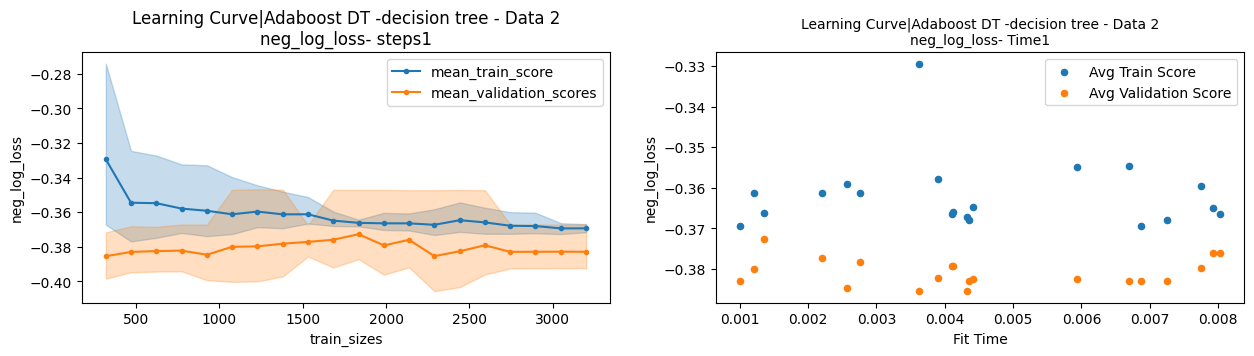

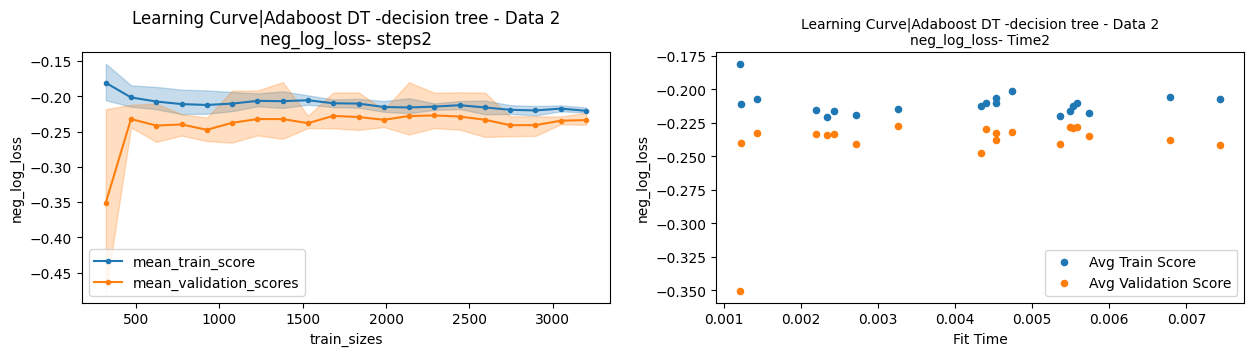

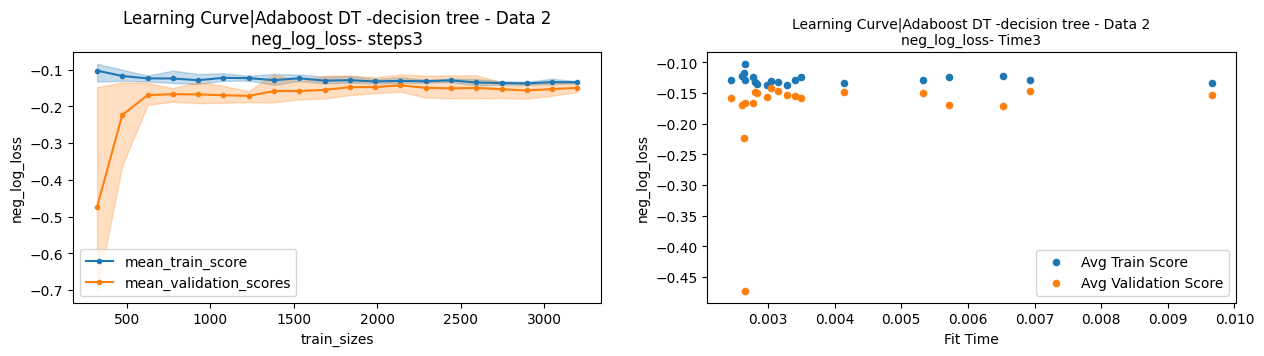

In [184]:
#DTC_2_test_list =[ DecisionTreeClassifier(max_depth=i) for i in [1,2,3] ]
DTC_2_test_list =[ DecisionTreeClassifier(max_depth=i,ccp_alpha=0.0008) for i in [1,2,3] ]



for i in DTC_2_test_list:
    

    
    
    
    plot_learning_curve( X=dataset_2.X_train,
                         y=dataset_2.y_train, 
                        model = i,
                        learning_curve_config=learning_curve_config_AD,
                        algorithm='Adaboost DT -decision tree',
                        data_set='Data 2',
                        misc =str(i.max_depth),
                        ylim=dict(ymax=None,ymin=None)#dict(ymax=0.25,ymin=-1)
                       )


In [53]:
dataset_1.X_train.shape

(22445, 6)

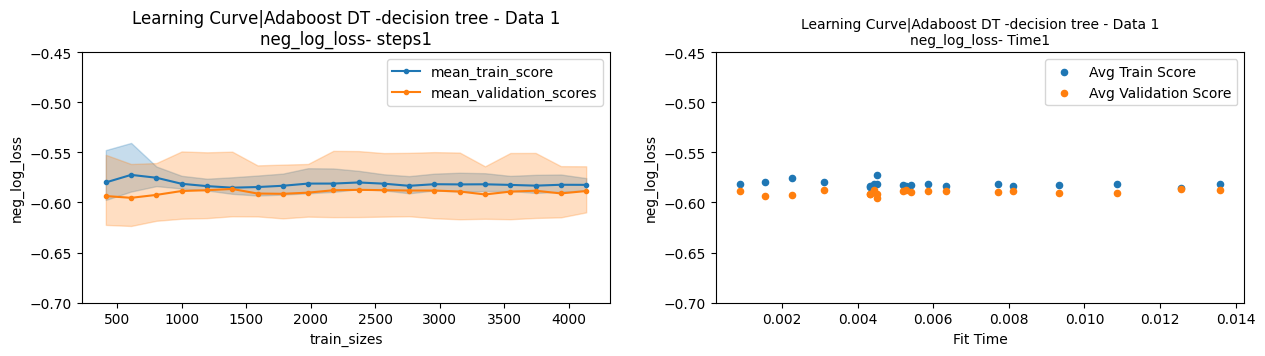

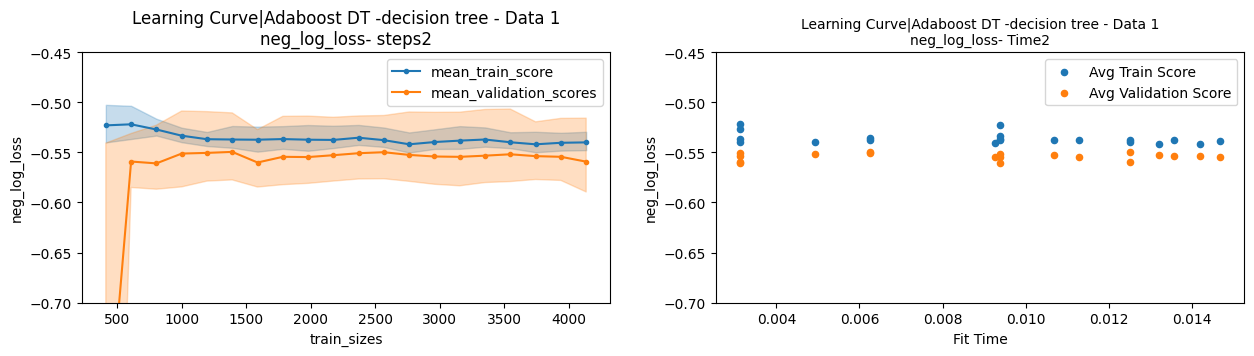

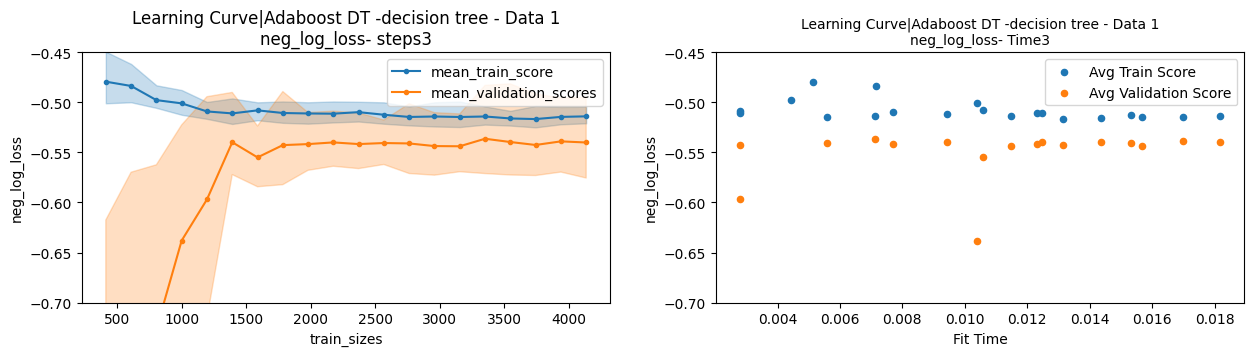

In [42]:
#DTC_1_test_list =[ DecisionTreeClassifier(max_depth=i) for i in [1,2,3] ]

DTC_1_test_list =[ DecisionTreeClassifier(max_depth=i,ccp_alpha=0.0001) for i in [1,2,3] ]



for i in DTC_1_test_list:
    

    
    
    
    plot_learning_curve( X=dataset_1.X_train,
                         y=dataset_1.y_train, 
                        model = i,
                        learning_curve_config=learning_curve_config_AD,
                        algorithm='Adaboost DT -decision tree',
                        data_set='Data 1',
                        misc =str(i.max_depth),
                        ylim=dict(ymax=-0.45,ymin=-0.7)#dict(ymax=0.25,ymin=-1)
                       )

In [198]:
 n_estimators=50,
     learning_rate=0.3,

In [43]:
DTC_2 = DecisionTreeClassifier(max_depth=5,ccp_alpha=0.00005,random_state=1) # making a more aggressive pruning

ABC_2 = AdaBoostClassifier(base_estimator = DTC_2,random_state=1,
                           n_estimators=50,
                           learning_rate=0.3)



DTC_1 = DecisionTreeClassifier(max_depth=1,ccp_alpha=0.0001,random_state=1) # making a more aggressive pruning

ABC_1 = AdaBoostClassifier(base_estimator = DTC_1,random_state=1,
                          n_estimators=50,
                           learning_rate=0.3)

In [44]:
abc_parameters = [{'n_estimators':np.append(np.arange(1,1000,100),np.arange(1001,4002,500)  )  },
             {'learning_rate':[0.001,0.003,0.01,0.03,0.1,0.3]}
             
             ]



abc_parameters_all = {'n_estimators':np.append(np.arange(1,1000,200),np.arange(1001,4002,500)  ) ,
                      'learning_rate':[0.001,0.003,0.01,0.03,0.1]}



In [45]:
learning_curve_config_AD = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=-1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)


n_estimators {'best_score': -0.12096276734530349, 'best_params': {'n_estimators': 1}} 
learning_rate {'best_score': -0.07795365127020557, 'best_params': {'learning_rate': 0.03}} 


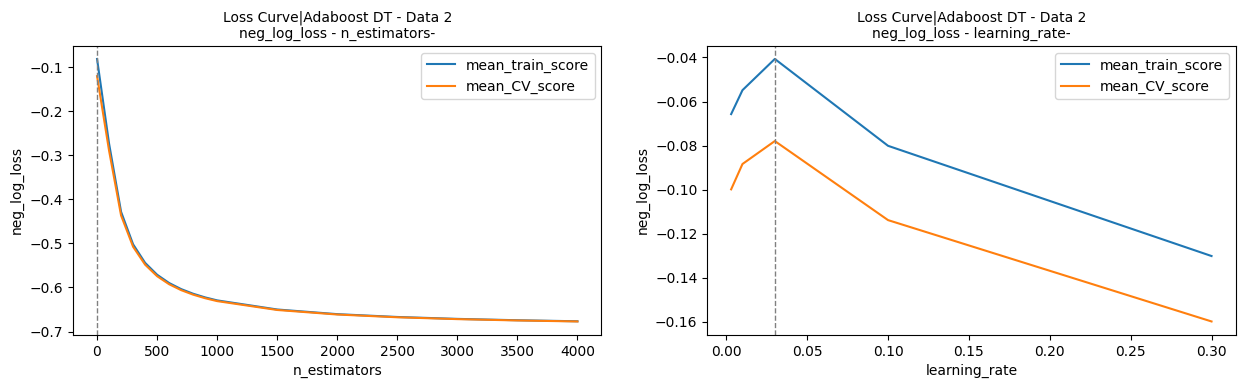

In [201]:
dataset_2.ADA['Adaboost_DT'] = dict({})
(dataset_2.ADA['Adaboost_DT']['loss_curve_GS'],
 dataset_2.ADA['Adaboost_DT']['GS_list'],
 dataset_2.ADA['Adaboost_DT']['DF_list'] ) = loss_curve(
                    
    
                GS=GS, 
    model=ABC_2, 
    X_train=dataset_2.X_train,
    y_train=dataset_2.y_train,
    algorithm='Adaboost DT',data_set='Data 2',
           parameters =abc_parameters ,GS_params = dict(
                                                            cv = 5 ,
                                                            n_jobs = -1,
                                                            scoring = 'neg_log_loss',
                                                            return_train_score=True
                                                        ),
                                 
                                 plot_config = dict(logx =False)
                                 
          ) 

{'best_score': -0.07558698811618272, 'best_params': {'learning_rate': 0.003, 'n_estimators': 601}}


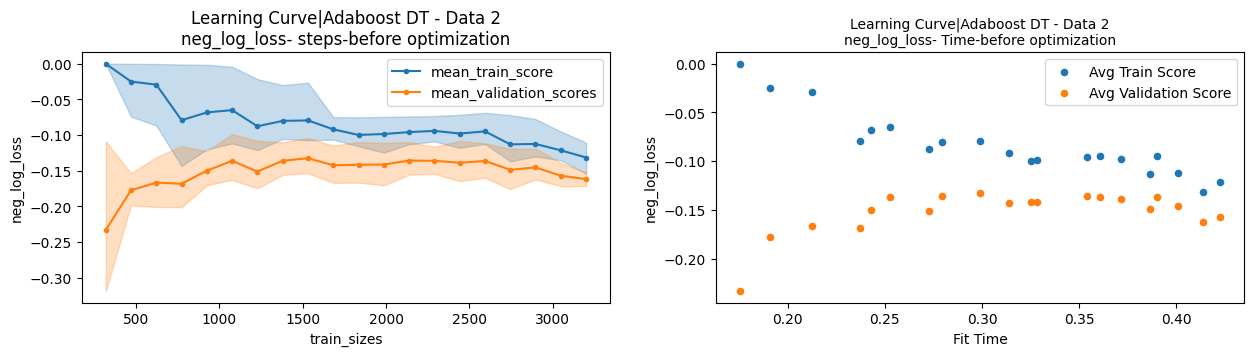

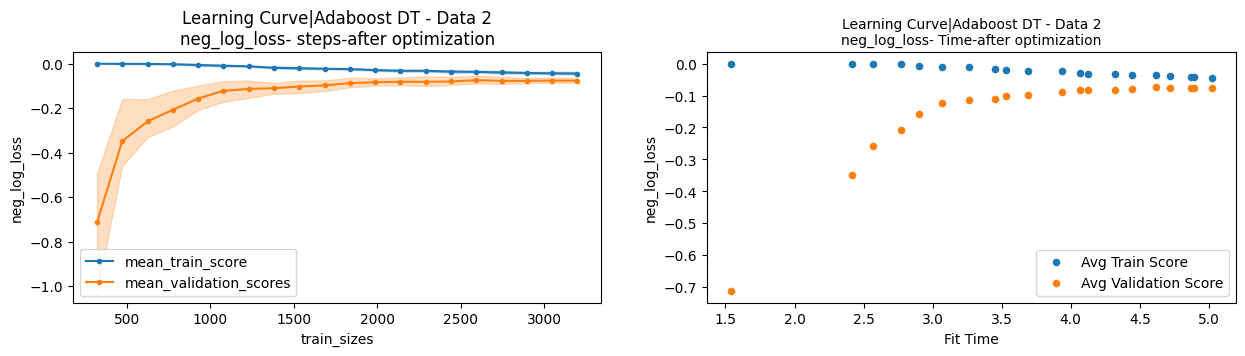

In [202]:



dataset_2.ADA['Adaboost_DT']['best_model_whole_data'] = GS_get_best_estimator(
            GS=GS, 
            model=ABC_2, X_train=dataset_2.X_train,y_train=dataset_2.y_train,
           parameters =abc_parameters_all,
                                                 
                                             GS_params = dict(
                                                        cv = 5 ,
                                                        n_jobs = -1,
                                                        scoring = 'neg_log_loss',
                                                        return_train_score=True
                                                    )

                                                 
                                                 
                       
                       
          )  

dataset_2.ADA['Adaboost_DT']['learning_curve'] = {
    
    
    
                'bf_opt':plot_learning_curve( X=dataset_2.X_train,
                     y=dataset_2.y_train, 
                    model = ABC_2,
                    learning_curve_config=learning_curve_config_AD,
                    algorithm='Adaboost DT',
                    data_set='Data 2',misc ='-before optimization',ylim=dict(ymax=None,ymin=None)#dict(ymax=0.25,ymin=-1)
                   ),
    
                'af_opt': plot_learning_curve( X=dataset_2.X_train,
                     y=dataset_2.y_train, 
                    model = AdaBoostClassifier(base_estimator =DTC_2, **dataset_2.ADA['Adaboost_DT'][
                'best_model_whole_data'].best_params_
                                                    ,random_state=1),
                    learning_curve_config=learning_curve_config_AD,
                    algorithm='Adaboost DT',
                    data_set='Data 2',misc ='-after optimization',ylim=dict(ymax=None,ymin=None)#dict(ymax=0.25,ymin=-1)
                   )
    
    
                    }

In [203]:
dataset_2.save()

In [47]:
dataset_1.ADA['Adaboost_DT'] = dict({})

n_estimators {'best_score': -0.5885670276867565, 'best_params': {'n_estimators': 1}} 
learning_rate {'best_score': -0.5797038819727718, 'best_params': {'learning_rate': 0.01}} 


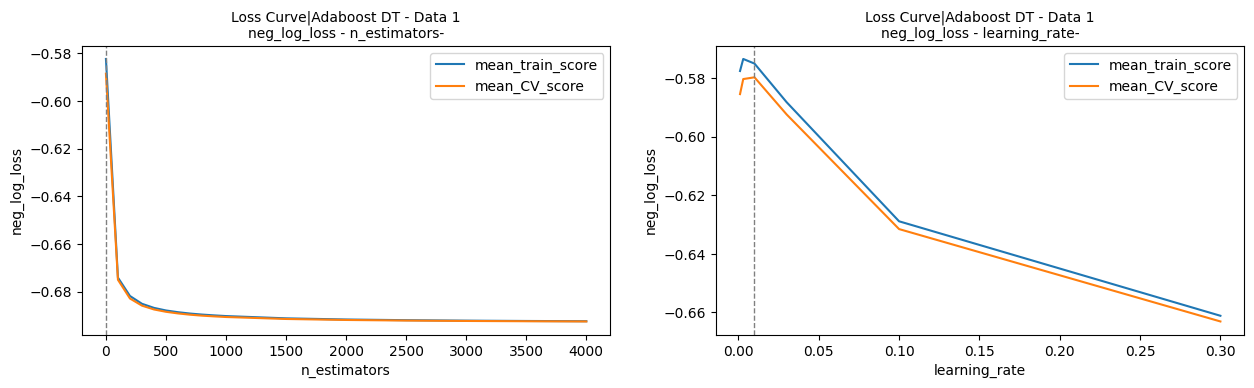

In [48]:

(dataset_1.ADA['Adaboost_DT']['loss_curve_GS'],
 dataset_1.ADA['Adaboost_DT']['GS_list'],
 dataset_1.ADA['Adaboost_DT']['DF_list']) = loss_curve(
                    
    
                GS=GS, 
    model=ABC_1, 
    X_train=dataset_1.X_train,
    y_train=dataset_1.y_train,
    algorithm='Adaboost DT',data_set='Data 1',
           parameters =abc_parameters ,GS_params = dict(
                                                            cv = 5 ,
                                                            n_jobs = -1,
                                                            scoring = 'neg_log_loss',
                                                            return_train_score=True
                                                        ),
                                 
                                 plot_config = dict(logx =False)
                                 
          ) 







{'best_score': -0.5788525546968422, 'best_params': {'learning_rate': 0.001, 'n_estimators': 201}}


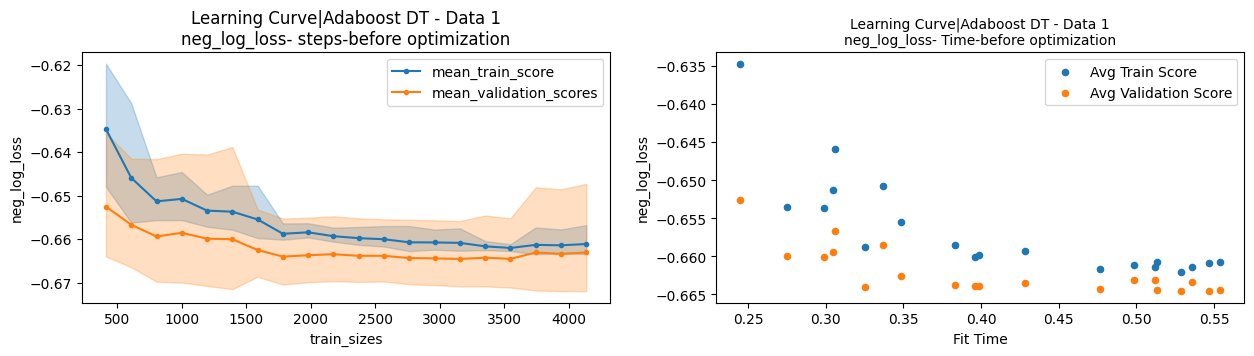

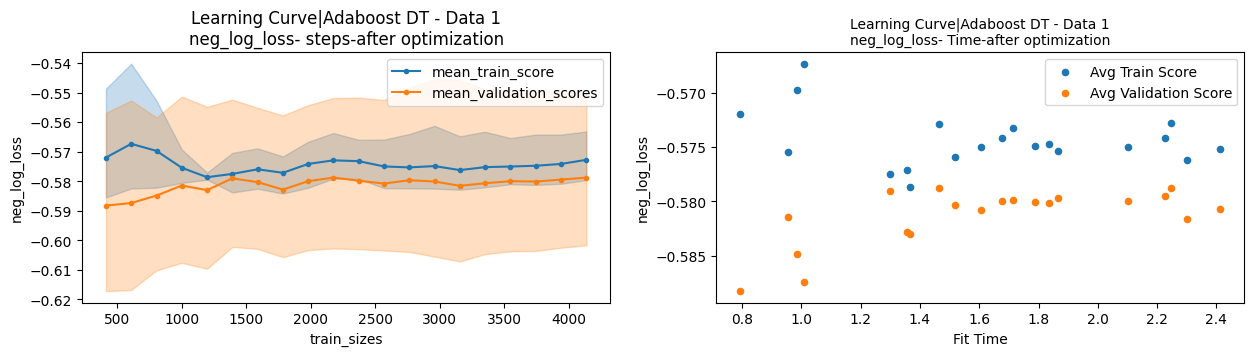

In [49]:




dataset_1.ADA['Adaboost_DT']['best_model_whole_data'] = GS_get_best_estimator(
            GS=GS, 
            model=ABC_1, X_train=dataset_1.X_train,y_train=dataset_1.y_train,
           parameters =abc_parameters_all,
                                                 
                                             GS_params = dict(
                                                        cv = 5 ,
                                                        n_jobs = -1,
                                                        scoring = 'neg_log_loss',
                                                        return_train_score=True
                                                    )

                                                 
                                                 
                       
                       
          )    



dataset_1.ADA['Adaboost_DT']['learning_curve'] = {
    
    
    
                'bf_opt':plot_learning_curve( X=dataset_1.X_train,
                     y=dataset_1.y_train, 
                    model = ABC_1,
                    learning_curve_config=learning_curve_config_AD,
                    algorithm='Adaboost DT',
                    data_set='Data 1',misc ='-before optimization',
                                             ylim=dict(ymax=None,ymin=None)#dict(ymax=0.25,ymin=-1)
                   ),
    
                'af_opt': plot_learning_curve( X=dataset_1.X_train,
                     y=dataset_1.y_train, 
                    model = AdaBoostClassifier(base_estimator =DTC_1, **dataset_1.ADA['Adaboost_DT'][
                'best_model_whole_data'].best_params_
                                                   ,random_state=1 ),
                    learning_curve_config=learning_curve_config_AD,
                    algorithm='Adaboost DT',
                    data_set='Data 1',misc ='-after optimization',
                                              ylim=dict(ymax=None,ymin=None)#dict(ymax=0.25,ymin=-1)
                   )
    
    
                    }

dataset_1.save()

In [323]:
import pickle

In [326]:
save_pickle(dataset_1,'./dataset_1.pickle')
save_pickle(dataset_2,'./dataset_2.pickle')

0.990012433185302

0.9840703998309115

In [3]:
import numpy as np

np.logspace(-2, 0., 10)

array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ])

## Support Vector Machines

In [291]:
SVC??

In [228]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf_1 = make_pipeline(StandardScaler(), SVC(kernel = 'rbf',gamma='auto'))
clf_2 = make_pipeline(StandardScaler(), SVC(kernel = 'poly',gamma='auto'))




In [36]:
np.logspace(-2, 1., 10)

array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ])

In [51]:
SVC_parameters = [#{'svc__C': np.logspace(-2, 0., 10)},
                  {'svc__gamma' : np.logspace(-2, 0., 5)}
                 ]

SVC_parameters_all = {#'svc__C': np.logspace(-2, 0., 10)
                          #,
                    'svc__gamma' : np.logspace(-2, 0., 5)
                     }

learning_curve_config_SVC = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)

learning_curve_config_SVC_2 = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)




SVC_GS_params = dict(
                        cv = 5 ,
                        n_jobs = 1,
                        scoring = 'neg_log_loss',
                        return_train_score=True
                    )




SVC_model = dict(
                poly  = make_pipeline(StandardScaler(), SVC(kernel = 'poly',gamma='auto',probability = True))
                ,rbf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf',gamma='auto',probability = True))
                ,sigmoid = make_pipeline(StandardScaler(), SVC(kernel = 'sigmoid',gamma='auto',probability = True))
              )

svc__gamma {'best_score': -0.6272975330623829, 'best_params': {'svc__gamma': 0.1}} -poly
svc__gamma {'best_score': -0.5183256619200809, 'best_params': {'svc__gamma': 0.1}} -rbf
svc__gamma {'best_score': -0.5418846059730795, 'best_params': {'svc__gamma': 0.01}} -sigmoid
Wall time: 1h 39min 59s


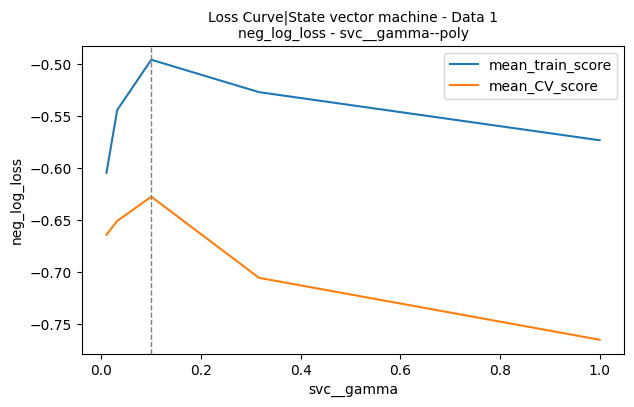

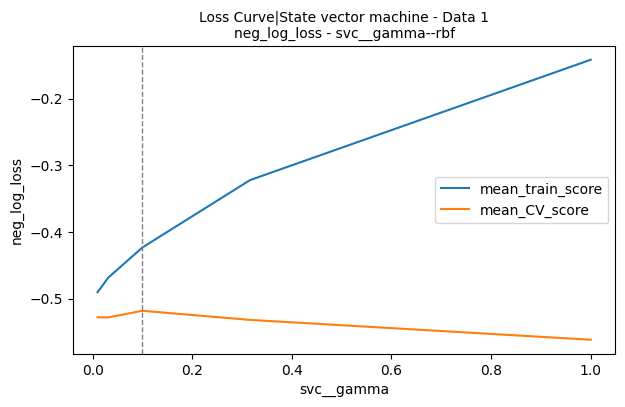

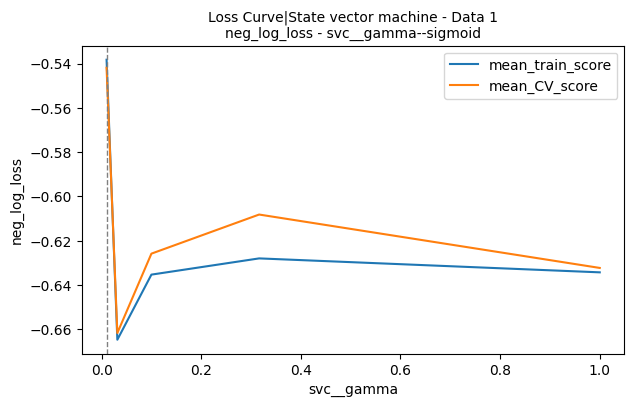

In [52]:
%%time

dataset_1.ADA['SVC'] = dict({
                            'poly':dict({}),
                            'rbf'  :dict({}),
                            'sigmoid'  :dict({}),
                        
                            }) 





for i in dataset_1.ADA['SVC'].keys():
    (dataset_1.ADA['SVC'][i]['loss_curve_GS'],
     dataset_1.ADA['SVC'][i]['GS_list'],
     dataset_1.ADA['SVC'][i]['DF_list'] )= loss_curve(


                    GS=GS, model=SVC_model[i],
                    X_train=dataset_1.X_train,
                    y_train=dataset_1.y_train,
                    algorithm='State vector machine',data_set='Data 1',misc=("-"+i),
               parameters =SVC_parameters ,
                GS_params = SVC_GS_params,

                plot_config = dict(logx =False)

              )    

In [53]:
dataset_1.save()

In [57]:
SVC_GS_params
.0

0.0

In [60]:

svc_rbf_d1 = make_pipeline(StandardScaler(), SVC(gamma=0.1,kernel = 'rbf',probability = True))

dataset_1.ADA['SVC']['best_model_whole_data'] = GS_get_best_estimator(GS=GS, 
                                                model=svc_rbf_d1, X_train=dataset_1.X_train,
                                                        y_train=dataset_1.y_train,
                                                parameters ={'svc__C': np.logspace(-2,  .0, 5),
                                                             'svc__gamma':[0.1],
                                                             'svc__kernel' : ['rbf']},
                                                 
                                                 GS_params = SVC_GS_params
                                                    
                                                  )    

{'best_score': -0.5154829457047537, 'best_params': {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}}


In [61]:
dataset_1.save() 

In [62]:
dataset_1.ADA['SVC'][
                'best_model_whole_data'].best_params_

{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [66]:
'svc__C'[5:]

'C'

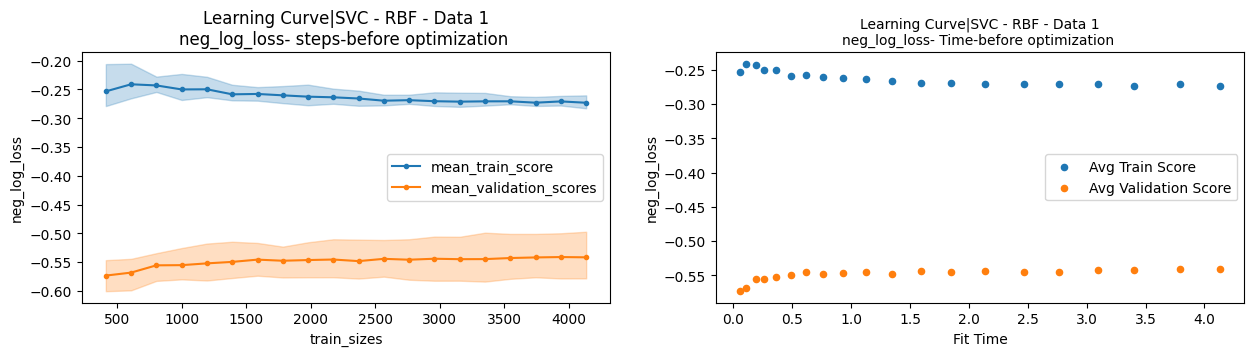

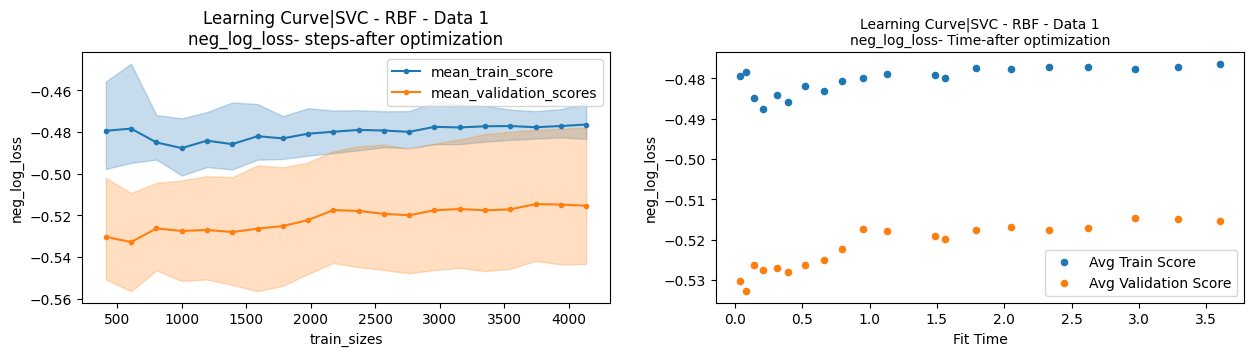

In [67]:
dataset_1.ADA['SVC']['learning_curve'] = {
    
    
    
                'bf_opt':plot_learning_curve( X=dataset_1.X_train,
                     y=dataset_1.y_train, 
                    model = make_pipeline(StandardScaler(), 
                                          SVC(gamma=0.5,C=0.8,
                                              kernel = 'rbf'
                                              ,probability = True)),
                    learning_curve_config=learning_curve_config_SVC_2,
                    algorithm='SVC - RBF',
                    data_set='Data 1',misc ='-before optimization ',ylim=dict(ymax=None,ymin=None)
                   ),
    
                'af_opt': plot_learning_curve( X=dataset_1.X_train,
                     y=dataset_1.y_train, 
                    model = make_pipeline(StandardScaler(), 
                                          SVC(**{i[5:]:j for i,j in dataset_1.ADA['SVC'][
                                                'best_model_whole_data'].best_params_.items() }
                                              ,probability = True)),
                    learning_curve_config=learning_curve_config_SVC_2,
                    algorithm='SVC - RBF',
                    data_set='Data 1',misc ='-after optimization',ylim=dict(ymax=None,ymin=None)
                   )
    
    
                    }

In [68]:
dataset_1.save()

In [71]:
dataset_2.ADA

{}

svc__gamma {'best_score': -0.08050467484462624, 'best_params': {'svc__gamma': 0.03162277660168379}} -poly
svc__gamma {'best_score': -0.07434126358494086, 'best_params': {'svc__gamma': 0.03162277660168379}} -rbf
svc__gamma {'best_score': -0.0772918380957919, 'best_params': {'svc__gamma': 0.03162277660168379}} -sigmoid
Wall time: 54.2 s


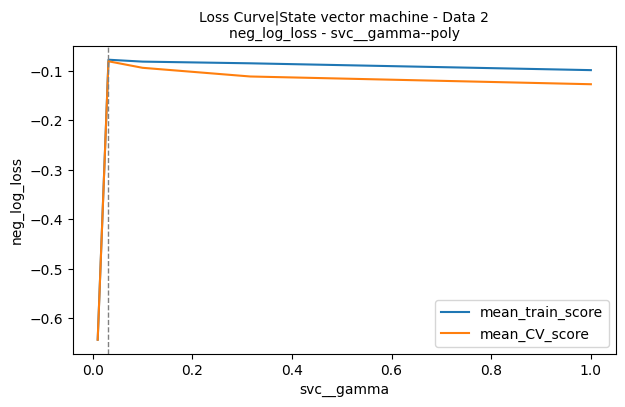

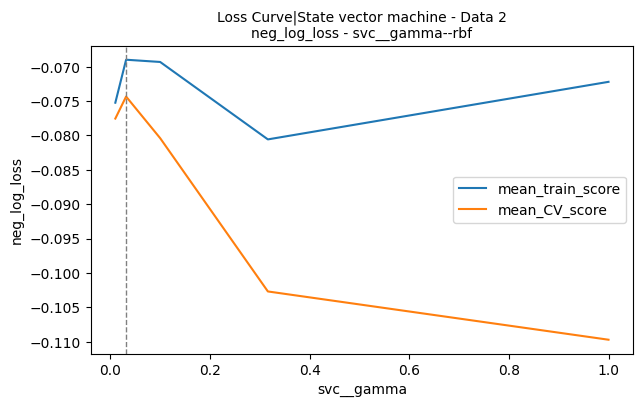

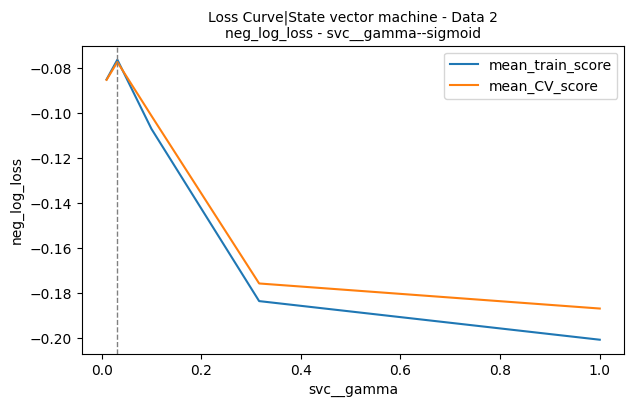

In [79]:
%%time

dataset_2.ADA['SVC'] = dict({
                            'poly':dict({}),
                            'rbf'  :dict({}),
                            'sigmoid'  :dict({}),
                        
                            }) 





for i in dataset_2.ADA['SVC'].keys():
    (dataset_2.ADA['SVC'][i]['loss_curve_GS'],
     dataset_2.ADA['SVC'][i]['GS_list'],
     dataset_2.ADA['SVC'][i]['DF_list'] )= loss_curve(


                    GS=GS, model=SVC_model[i],
                    X_train=dataset_2.X_train,
                    y_train=dataset_2.y_train,
                    algorithm='State vector machine',data_set='Data 2',misc=("-"+i),
               parameters =SVC_parameters ,
                GS_params = SVC_GS_params,

                plot_config = dict(logx =False)

              )    

In [80]:
dataset_2.save()

In [85]:

svc_rbf_2 = make_pipeline(StandardScaler(), SVC(gamma=0.03162277660168379,
                                                kernel = 'rbf',probability = True))

dataset_2.ADA['SVC']['best_model_whole_data'] = GS_get_best_estimator(GS=GS, 
                                                model=svc_rbf_2, X_train=dataset_2.X_train,
                                                        y_train=dataset_2.y_train,
                                                parameters ={'svc__C': np.logspace(-2, 0., 5),
                                                            'svc__gamma':[0.03162277660168379],
                                                            'svc__kernel' : ['rbf']
                                                            
                                                            
                                                            
                                                            },
                                                 
                                                 GS_params = SVC_GS_params
                                                    
                                                  )    

{'best_score': -0.07410387327524126, 'best_params': {'svc__C': 1.0, 'svc__gamma': 0.03162277660168379, 'svc__kernel': 'rbf'}}


In [82]:
SVC_parameters = [#{'svc__C': np.logspace(-2, 0., 10)},
                  {'svc__gamma' : np.logspace(-2, 0., 5)}
                 ]

SVC_parameters_all = {#'svc__C': np.logspace(-2, 0., 10)
                          #,
                    'svc__gamma' : np.logspace(-2, 0., 5)
                     }

learning_curve_config_SVC = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)

learning_curve_config_SVC_2 = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)




SVC_GS_params = dict(
                        cv = 5 ,
                        n_jobs = 1,
                        scoring = 'neg_log_loss',
                        return_train_score=True
                    )


SVC_model = dict(
                poly  = make_pipeline(StandardScaler(), SVC(kernel = 'poly',gamma='auto',probability = True))
                ,rbf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf',gamma='auto',probability = True))
                ,sigmoid = make_pipeline(StandardScaler(), SVC(kernel = 'sigmoid',gamma='auto',probability = True))
              )

In [87]:
dataset_2.save()

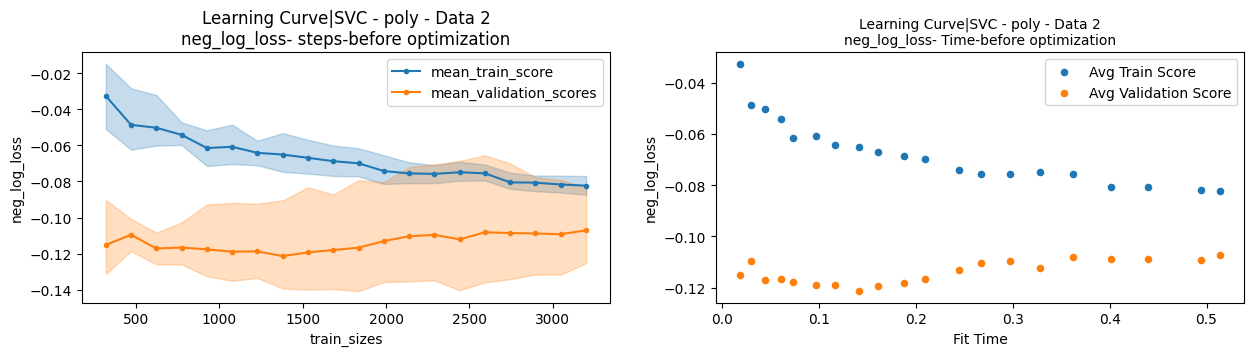

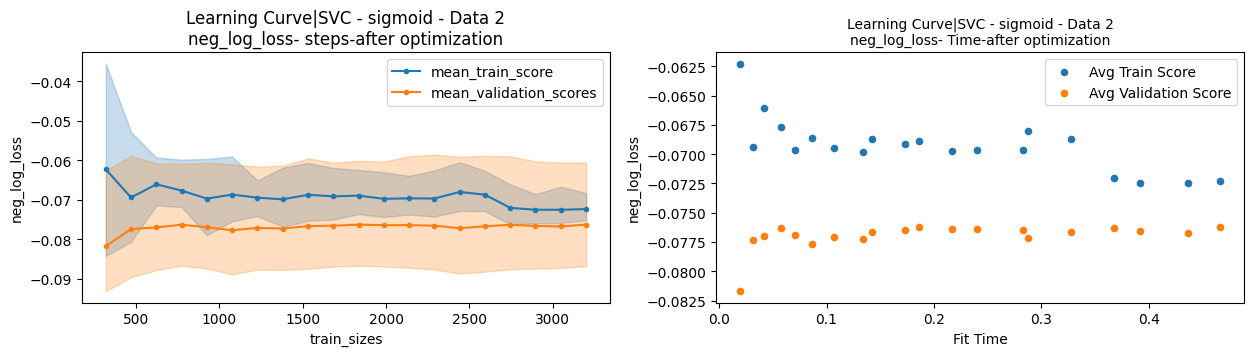

In [86]:
dataset_2.ADA['SVC']['learning_curve'] = {
    
    
    
                'bf_opt':plot_learning_curve( X=dataset_2.X_train,
                     y=dataset_2.y_train, 
                    model = make_pipeline(StandardScaler(), 
                                          SVC(gamma=0.5,C=0.5,
                                              kernel = 'rbf'
                                              ,probability = True)),
                    learning_curve_config=learning_curve_config_SVC_2,
                    algorithm='SVC - poly',
                    data_set='Data 2',misc ='-before optimization',ylim=dict(ymax=None,ymin=None)
                   ),
    
                'af_opt': plot_learning_curve( X=dataset_2.X_train,
                     y=dataset_2.y_train, 
                    model = make_pipeline(StandardScaler(), 
                                          SVC(**{i[5:]:j for i,j in dataset_1.ADA['SVC'][
                                                'best_model_whole_data'].best_params_.items() }
                                              ,probability = True)),
                    learning_curve_config=learning_curve_config_SVC_2,
                    algorithm='SVC - sigmoid',
                    data_set='Data 2',misc ='-after optimization',ylim=dict(ymax=None,ymin=None)
                   )
    
    
                    }

In [ ]:
dataset_2.save()

## K nearest Neighbour

In [93]:
dataset_1.ADA['KNN'] = dict({})

n_neighbors {'best_score': -0.5268311138870463, 'best_params': {'n_neighbors': 200}} 
{'n_neighbors': 200}
p {'best_score': -2.7826646756748787, 'best_params': {'p': 1}} 
{'p': 1}


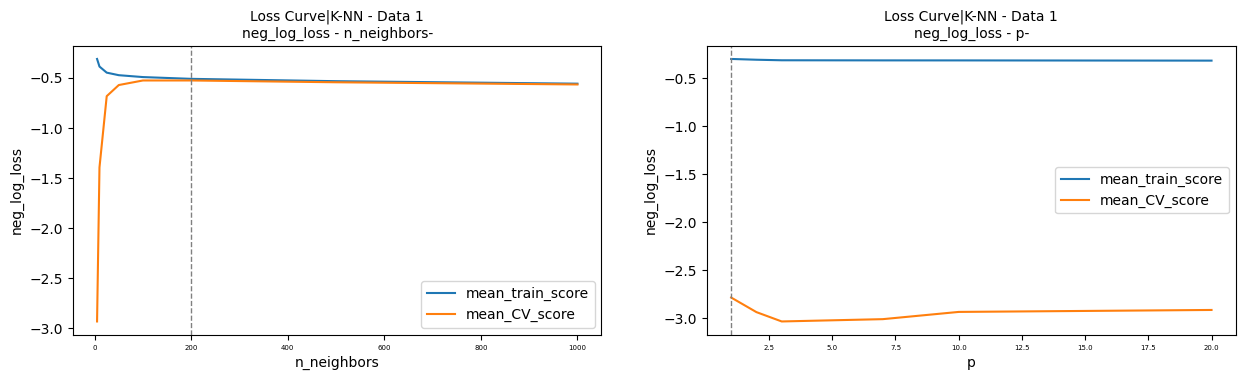

In [130]:

KNN_1_config = [{'n_neighbors' : [5,10,25,50 ,100,200,500,1000]},
               {'p' : [1 ,2 ,3,7,10,20]},
               #n_neighbors=5,n_jobs  = -1,p=2        
               #{'min_samples_split':np.arange(2,2000,40)}

               ]


               



KNN_1_GS_params = dict(
                            cv = 5 ,
                            n_jobs = 1,
                            scoring = 'neg_log_loss',
                            return_train_score=True
                        )


std_c_1 = StandardScaler()
std_c_1.fit(dataset_1.X_train)

knn_X_train = std_c_1.transform(dataset_1.X_train)
(dataset_1.ADA['KNN']['loss_curve_GS'],
 dataset_1.ADA['KNN']['GS_list'],
 dataset_1.ADA['KNN']['DF_list'] )= loss_curve(
                    
    
                GS=GS, model=KNeighborsClassifier(n_jobs=-1),
                                X_train=knn_X_train,
                                y_train=dataset_1.y_train,
                                 algorithm='K-NN',data_set='Data 1',
           parameters =KNN_1_config ,GS_params = KNN_1_GS_params,
                                 
                                 plot_config = dict(logx =False),ylim=[dict(ymax=None,ymin=None),
                                                                       dict(ymax=None,ymin=None)]
                                 
          )    


In [238]:
dataset_1.ADA['KNN']['DF_list']

{'n_neighbors':              mean_train_score  mean_CV_score
 n_neighbors                                 
 5                   -0.311854      -2.934267
 10                  -0.387767      -1.396033
 25                  -0.448634      -0.683630
 50                  -0.474049      -0.572430
 100                 -0.492858      -0.526876
 200                 -0.510608      -0.526831
 500                 -0.533948      -0.544719
 1000                -0.558803      -0.566723,
 'p':     mean_train_score  mean_CV_score
 p                                  
 1          -0.303818      -2.782665
 2          -0.311854      -2.934267
 3          -0.317520      -3.031232
 7          -0.318665      -3.007266
 10         -0.318891      -2.932125
 20         -0.321153      -2.911756}

In [131]:

KNN_1_config_all = {'n_neighbors' : [5,10,25,50 ,100,200,500,1000],'p' : [1 ,2 ,3,7,10,20]}
               #n_neighbors=5,n_jobs  = -1,p=2        
               #{'min_samples_split':np.arange(2,2000,40)}


In [132]:

               


dataset_1.ADA['KNN']['best_model_whole_data'] = GS_get_best_estimator(GS=GS, 
                        model=KNeighborsClassifier(n_jobs=-1), 
                                  X_train=knn_X_train,
                                   y_train=dataset_1.y_train,
           parameters =KNN_1_config_all,GS_params =KNN_1_GS_params
          )    

{'best_score': -0.523848377839284, 'best_params': {'n_neighbors': 100, 'p': 3}}


In [102]:
learning_curve_config_KNN_1 = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)




#KNN_GS_params = dict(
#                        cv = 5 ,
#                        n_jobs = 1,
#                        scoring = 'neg_log_loss',
#                        return_train_score=True
#                    )

{'cv': 5,
 'train_sizes': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
        0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
        0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
        0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ]),
 'n_jobs': -1,
 'return_times': True,
 'shuffle': True,
 'scoring': 'neg_log_loss',
 'random_state': 1}

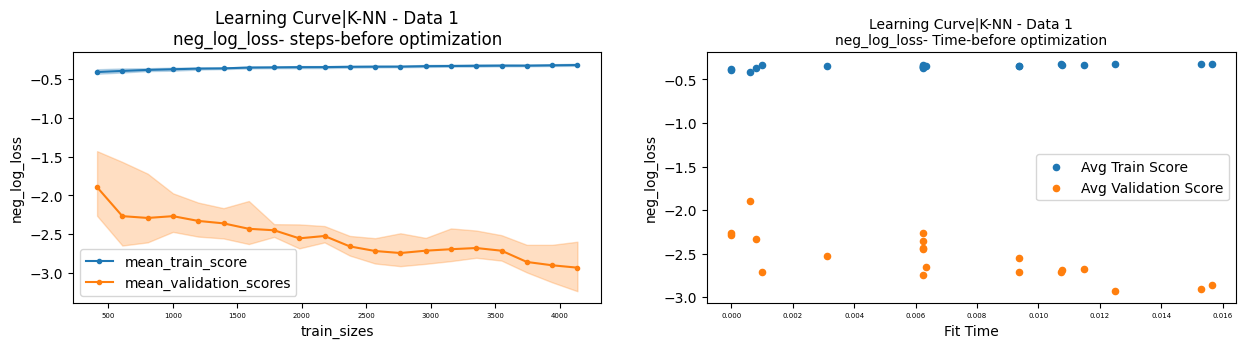

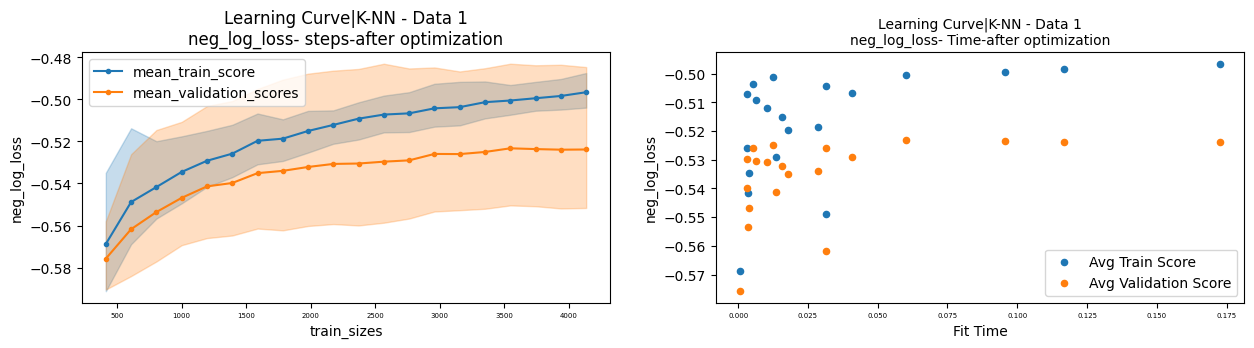

In [133]:
KNN_1_config_before_optim = {'n_neighbors' : 5,'p' : 10 }

learning_curve_config_KNN_1 = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=-1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)

dataset_1.ADA['KNN']['learning_curve'] = {
    
    
    
                'bf_opt':plot_learning_curve( X=knn_X_train,
                     y=dataset_1.y_train, 
                    model = KNeighborsClassifier(**KNN_1_config_before_optim,n_jobs=-1),
                    learning_curve_config=learning_curve_config_KNN_1,
                    algorithm='K-NN',
                    data_set='Data 1',misc ='-before optimization',ylim=dict(ymax=None,ymin=None)
                   ),
    
                'af_opt': plot_learning_curve( X=knn_X_train,
                     y=dataset_1.y_train, 
                    model = KNeighborsClassifier(**dataset_1.ADA['KNN'][
                                                    'best_model_whole_data'].best_params_,n_jobs=-1
                                                    ),
                    learning_curve_config=learning_curve_config_KNN_1,
                    algorithm='K-NN',
                    data_set='Data 1',misc ='-after optimization',ylim=dict(ymax=None,ymin=None)
                   )
    
    
                    }

In [134]:
dataset_1.save()

In [105]:
dataset_2.ADA['KNN'] = dict({})

n_neighbors {'best_score': -0.09076840447743756, 'best_params': {'n_neighbors': 200}} 
{'n_neighbors': 200}
p {'best_score': -0.3139130445914488, 'best_params': {'p': 1}} 
{'p': 1}


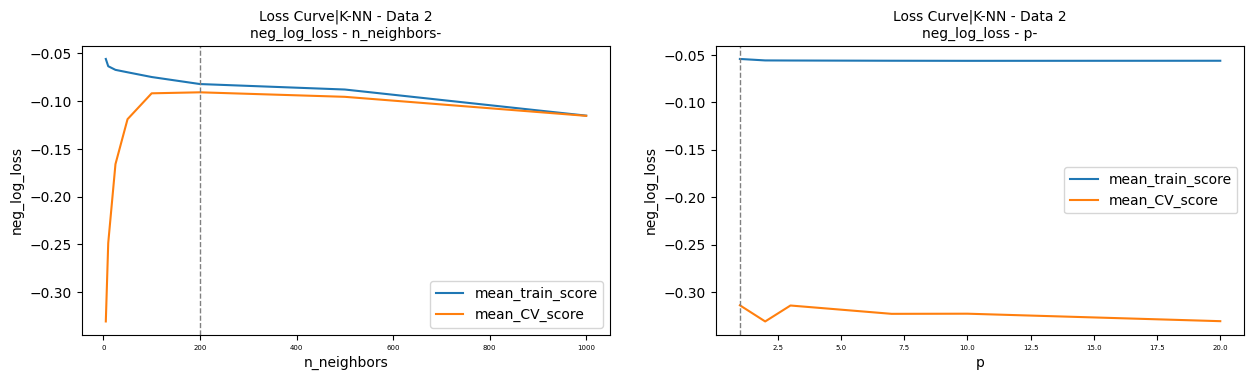

In [135]:

KNN_2_config = [{'n_neighbors' : [5,10,25,50 ,100,200,500,1000]},
               {'p' : [1 ,2 ,3,7,10,20]},
               #n_neighbors=5,n_jobs  = -1,p=2        
               #{'min_samples_split':np.arange(2,2000,40)}

               ]


               



KNN_2_GS_params = dict(
                            cv = 5 ,
                            n_jobs = 1,
                            scoring = 'neg_log_loss',
                            return_train_score=True
                        )



std_c_2 = StandardScaler()
std_c_2.fit(dataset_2.X_train)

knn_X_train_2 = std_c_2.transform(dataset_2.X_train)

(dataset_2.ADA['KNN']['loss_curve_GS'],
 dataset_2.ADA['KNN']['GS_list'],
 dataset_2.ADA['KNN']['DF_list'] )= loss_curve(
                    
    
                GS=GS, model=KNeighborsClassifier(n_jobs=-1),
                                X_train=knn_X_train_2,
                                y_train=dataset_2.y_train,
                                 algorithm='K-NN',data_set='Data 2',
           parameters =KNN_2_config ,GS_params = KNN_2_GS_params,
                                 
                                 plot_config = dict(logx =False),ylim=[dict(ymax=None,ymin=None),
                                                                       dict(ymax=None,ymin=None)]
                                 
          )    


In [137]:

KNN_2_config_all = {'n_neighbors' : [5,10,25,50 ,100,200,500,1000],'p' : [1 ,2 ,3,7,10,20]}
               #n_neighbors=5,n_jobs  = -1,p=2        
               #{'min_samples_split':np.arange(2,2000,40)}

               


dataset_2.ADA['KNN']['best_model_whole_data'] = GS_get_best_estimator(GS=GS, 
                        model=KNeighborsClassifier(n_jobs=-1), 
                                  X_train=knn_X_train_2,
                                   y_train=dataset_2.y_train,
           parameters =KNN_2_config_all,GS_params =KNN_2_GS_params
          )    

{'best_score': -0.08688899445698245, 'best_params': {'n_neighbors': 200, 'p': 1}}


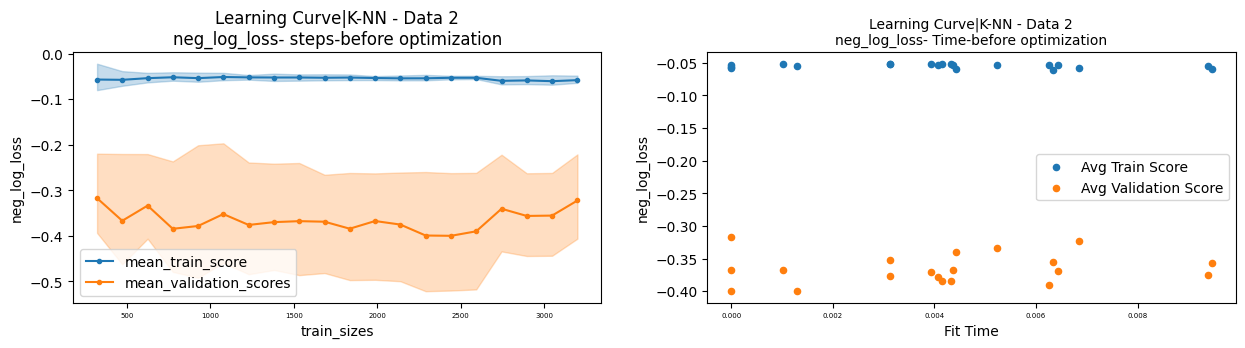

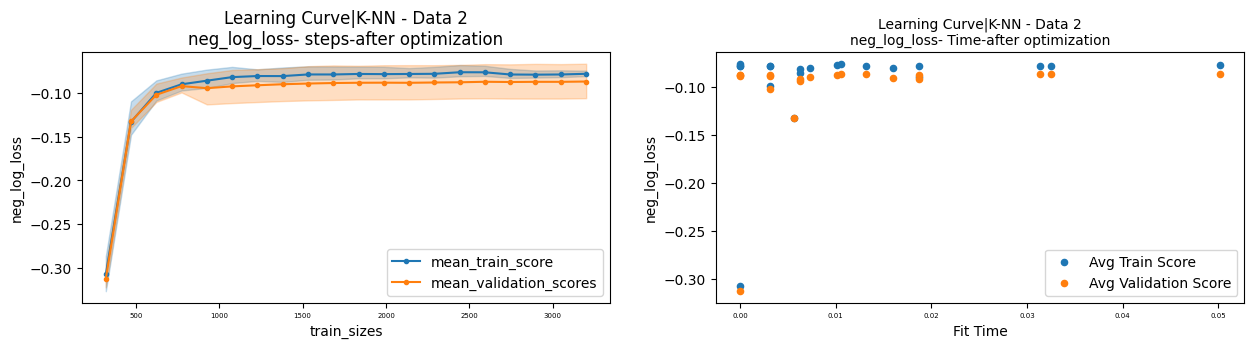

In [138]:
KNN_2_config_before_optim = {'n_neighbors' : 5,'p' : 10 }

learning_curve_config_KNN_2 = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=-1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)


dataset_2.ADA['KNN']['learning_curve'] = {
    
    
    
                'bf_opt':plot_learning_curve( X=knn_X_train_2,
                     y=dataset_2.y_train, 
                    model = KNeighborsClassifier(**KNN_2_config_before_optim,n_jobs=-1),
                    learning_curve_config=learning_curve_config_KNN_2,
                    algorithm='K-NN',
                    data_set='Data 2',misc ='-before optimization',ylim=dict(ymax=None,ymin=None)
                   ),
    
                'af_opt': plot_learning_curve( X=knn_X_train_2,
                     y=dataset_2.y_train, 
                    model = KNeighborsClassifier(**dataset_2.ADA['KNN'][
                                                    'best_model_whole_data'].best_params_,n_jobs=-1
                                                    ),
                    learning_curve_config=learning_curve_config_KNN_2,
                    algorithm='K-NN',
                    data_set='Data 2',misc ='-after optimization',ylim=dict(ymax=None,ymin=None)
                   )
    
    
                    }

In [139]:
dataset_2.save()

In [113]:
dataset_1.address

'./dataset_1.pickle'

In [111]:
dataset_2.address

'./dataset_2_v2.pickle'

## Neural Network

In [9]:
dataset_2.ADA['NN'] = dict({})

In [144]:
from sklearn.neural_network import MLPClassifier  as NNC

In [119]:
NNC??

(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)

Init signature:
NNC(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Source:        
class MLPClassifier(ClassifierMixin, BaseMultilayerPerceptron):
    """Multi-layer Perceptron classifier.

    This model optimizes the log-loss function using LBFGS or stochastic
    gradient descent.

    .. versionadded:: 0.18

    Parameters
    ----------
    hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
        The ith element represents the number of neurons in the ith
        hidden layer.

    activation : {'identit

In [ ]:
np.logspace(32,)

In [9]:
#NNC??


NN_all_hyps_curves = [[{'nn__hidden_layer_sizes':[
                        (16,),
                        (32,), (64,),
                        (32,16,),
                        (32,32,),
                        (64,32,),
                        (32,16,16,),
                        (32,32,16,),
                        (64,32,16,),
                        #(128,64,32,),
                        ]}]
 
 ,[{'nn__learning_rate_init' : np.logspace(-4,-1,7).astype(np.float32)}]
 ,[{'nn__batch_size': [4,8,16,32,64,128]}]
 ,[{'nn__momentum' : np.logspace(-4,-0.05,7).astype(np.float32)}]
]
_
NN_early_stopping = True

In [10]:
25*3*5

375

In [11]:
NN_all_hyps_curves_all= {'nn__hidden_layer_sizes':[
                        (16,),
                        (32,), (64,),
                        (32,16,),
                        (32,32,),
                        
                        #(128,64,32,),
                        ]
 
                     ,'nn__learning_rate_init' : np.logspace(-4,-1,5).astype(np.float32)
                     ,'nn__batch_size': [8,16,32]
                     ,'nn__momentum' : np.logspace(-4,-0.05,5).astype(np.float32)}
                    




for i in NN_all_hyps_curves:
    
    NN_all_hyps_curves_all.update(i[0])
    
    
    
NN_all_hyps_curves_all

{'nn__hidden_layer_sizes': [(16,),
  (32,),
  (64,),
  (32, 16),
  (32, 32),
  (64, 32),
  (32, 16, 16),
  (32, 32, 16),
  (64, 32, 16)],
 'nn__learning_rate_init': array([9.9999997e-05, 3.1622776e-04, 1.0000000e-03, 3.1622776e-03,
        9.9999998e-03, 3.1622775e-02, 1.0000000e-01], dtype=float32),
 'nn__batch_size': [4, 8, 16, 32, 64, 128],
 'nn__momentum': array([9.9999997e-05, 4.5533740e-04, 2.0733215e-03, 9.4406083e-03,
        4.2986624e-02, 1.9573417e-01, 8.9125091e-01], dtype=float32)}

In [12]:
dataset_2.ADA['NN_test'] = dict({})

In [145]:
def trans_func(input_series):
    return input_series.values

#trans_func = lambda x: x.values

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(trans_func)

In [147]:
from sklearn.pipeline import Pipeline

In [148]:
#NN_2_config = [{'ccp_alpha' : np.linspace(0,0.01,500)},
#               {'max_depth' : [1,2,3,4,5,6,7,8,9]},
#                       
#               #{'min_samples_split':np.arange(2,2000,40)}
#
#               ]

#make_pipeline([StandardScaler(),()])

NN_pipe = Pipeline([('std',StandardScaler()),
                         #('transfor',transformer),
                         ('nn',NNC(early_stopping=NN_early_stopping,random_state = 1,
                                  
                                  hidden_layer_sizes=(32, 16)
                                   ,learning_rate_init= 0.001
                                    ,batch_size= 24
                                    ,momentum= 0
                                  
                                  ))])

NN_2_GS_params = dict(
                            cv = 5 ,
                            n_jobs = -1,
                            scoring = 'neg_log_loss',
                            return_train_score=True
                        )

plt.rc('xtick', labelsize=10) 

---------------- {'nn__hidden_layer_sizes': [{'nn__hidden_layer_sizes': [(16,), (32,), (64,), (32, 16), (32, 32), (64, 32), (32, 16, 16), (32, 32, 16), (64, 32, 16)]}]}
nn__hidden_layer_sizes {'best_score': -0.07762109780800844, 'best_params': {'nn__hidden_layer_sizes': (64,)}} -nn__hidden_layer_sizes
{'nn__hidden_layer_sizes': (64,)}
---------------- {'nn__learning_rate_init': [{'nn__learning_rate_init': array([9.9999997e-05, 3.1622776e-04, 1.0000000e-03, 3.1622776e-03,
       9.9999998e-03, 3.1622775e-02, 1.0000000e-01], dtype=float32)}]}
nn__learning_rate_init {'best_score': -0.07928455231980494, 'best_params': {'nn__learning_rate_init': 0.01}} -nn__learning_rate_init
{'nn__learning_rate_init': 0.01}
---------------- {'nn__batch_size': [{'nn__batch_size': [4, 8, 16, 32, 64, 128]}]}
nn__batch_size {'best_score': -0.07925084253290272, 'best_params': {'nn__batch_size': 16}} -nn__batch_size
{'nn__batch_size': 16}
---------------- {'nn__momentum': [{'nn__momentum': array([9.9999997e-05, 

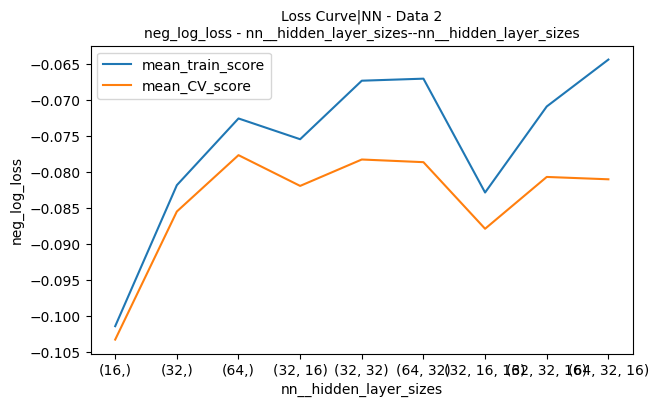

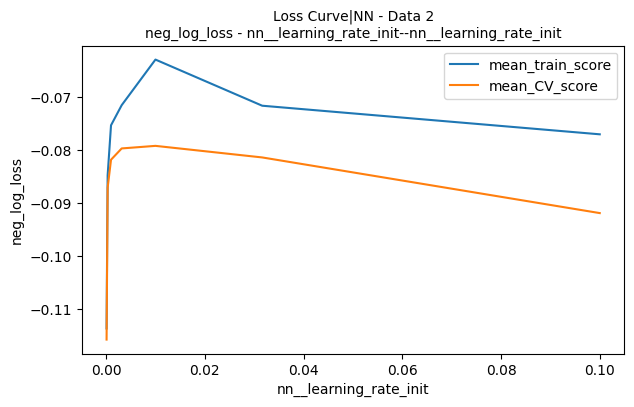

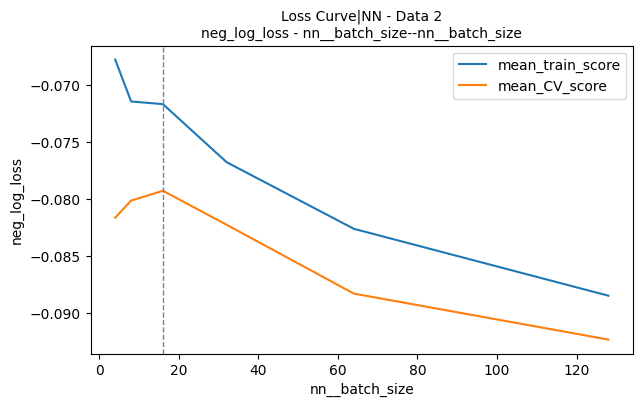

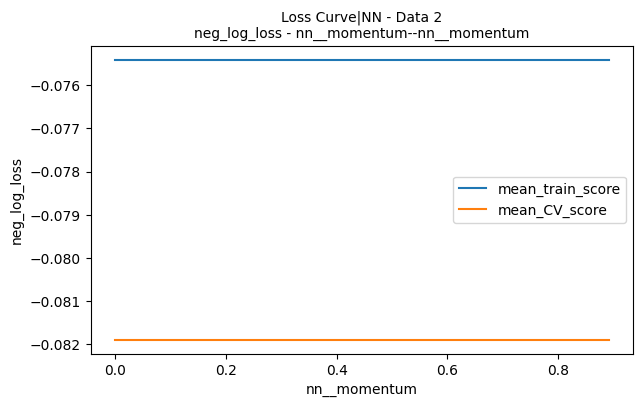

In [18]:




for i in NN_all_hyps_curves:

    selected_i = list(i[0].keys())[0]
    
    NN_2_config = i#[0][selected_i]
    
    dataset_2.ADA['NN_test'][selected_i] = dict({})
    
    print('----------------',{selected_i:NN_2_config})
    
    
    (dataset_2.ADA['NN_test'][selected_i]['loss_curve_GS'],
      dataset_2.ADA['NN_test'][selected_i]['GS_list'],
      dataset_2.ADA['NN_test'][selected_i]['DF_list']) = loss_curve(


             GS=GS, 
             model=NN_pipe,
             X_train=dataset_2.X_train,
             y_train=dataset_2.y_train,
             algorithm='NN',
             data_set='Data 2',
             misc='-'+selected_i,
             parameters =NN_2_config ,
             GS_params = NN_2_GS_params,

             plot_config = dict(logx =False),
             #ylim=[dict(ymax=None,ymin=None)]

               )  
    
    
#{'best_score': -0.07266282449542996,
# 'best_params': {'nn__batch_size': 16,
# 'nn__hidden_layer_sizes': (64,),
# 'nn__learning_rate_init': 0.031622775,
# 'nn__momentum': 1e-04}}
#


In [149]:
NN_1_GS_params = {'cv': 5, 'n_jobs': 1, 'scoring': 'neg_log_loss', 'return_train_score': True}



In [225]:
#NNC??

In [20]:



dataset_2.ADA['NN_test']['best_model_whole_data'] = GS_get_best_estimator(GS=GS, 
                        model=NN_pipe, 
                                  X_train=dataset_2.X_train,
                                   y_train=dataset_2.y_train,
           parameters =NN_all_hyps_curves_all ,GS_params =NN_1_GS_params
          )

{'best_score': -0.07266282449542996, 'best_params': {'nn__batch_size': 16, 'nn__hidden_layer_sizes': (64,), 'nn__learning_rate_init': 0.031622775, 'nn__momentum': 1e-04}}


In [21]:
dataset_2.save()

In [33]:
from sklearn.model_selection import StratifiedKFold as s_cv




In [23]:
dataset_1.ADA['NN_test'] = dict({})

In [150]:

NN_all_hyps_curves_1 = [[{'nn__hidden_layer_sizes':[
                        (16,),
                        (32,), (64,),
                        (32,16,),
                        (32,32,),
                        (64,32,),
                        (32,16,16,),
                        (32,32,16,),
                        (64,32,16,),
                        #(128,64,32,),
                        ]}]
 
 ,[{'nn__learning_rate_init' : np.logspace(-4,-0.1,10).astype(np.float32)}]
 ,[{'nn__batch_size': [4,8,16,32,64,128,254,512,1024]}]
 ,[{'nn__momentum' : np.logspace(-4,-0.05,10).astype(np.float32)}]
]
_
NN_early_stopping = True



#NN_1_config = [{'ccp_alpha' : np.linspace(0,0.01,500)},
#               {'max_depth' : [1,2,3,4,5,6,7,8,9]},
#                       
#               #{'min_samples_split':np.arange(2,2000,40)}
#
#               ]

#make_pipeline([StandardScaler(),()])

NN_pipe = Pipeline([('std',StandardScaler()),
                         #('transfor',transformer),
                         ('nn',NNC(early_stopping=NN_early_stopping,
                                   random_state = 1,
                                  
                                  hidden_layer_sizes=(32, 16)
                                   ,learning_rate_init= 0.001
                                    ,batch_size= 24
                                    ,momentum= 0
                                   
                                  
                                  ))])

NN_1_GS_params = dict(
                            cv = 5,#s_cv(n_splits=5, random_state=1) ,
                            n_jobs = -1,
                            scoring = 'neg_log_loss',
                            return_train_score=True
                        )

plt.rc('xtick', labelsize=5) 

---------------- {'nn__hidden_layer_sizes': [{'nn__hidden_layer_sizes': [(16,), (32,), (64,), (32, 16), (32, 32), (64, 32), (32, 16, 16), (32, 32, 16), (64, 32, 16)]}]}
nn__hidden_layer_sizes {'best_score': -0.5194713874216744, 'best_params': {'nn__hidden_layer_sizes': (32,)}} -nn__hidden_layer_sizes
{'nn__hidden_layer_sizes': (32,)}
---------------- {'nn__learning_rate_init': [{'nn__learning_rate_init': array([9.9999997e-05, 2.7122727e-04, 7.3564227e-04, 1.9952622e-03,
       5.4116952e-03, 1.4677993e-02, 3.9810717e-02, 1.0797752e-01,
       2.9286444e-01, 7.9432821e-01], dtype=float32)}]}
nn__learning_rate_init {'best_score': -0.5281964213990945, 'best_params': {'nn__learning_rate_init': 1e-04}} -nn__learning_rate_init
{'nn__learning_rate_init': 1e-04}
---------------- {'nn__batch_size': [{'nn__batch_size': [4, 8, 16, 32, 64, 128, 254, 512, 1024]}]}
nn__batch_size {'best_score': -0.5355699808118867, 'best_params': {'nn__batch_size': 512}} -nn__batch_size
{'nn__batch_size': 512}
-----

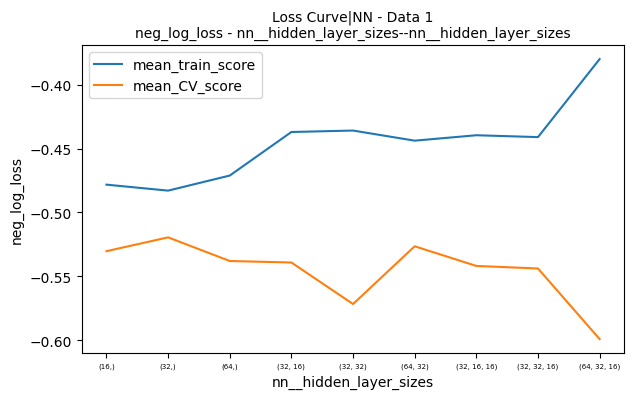

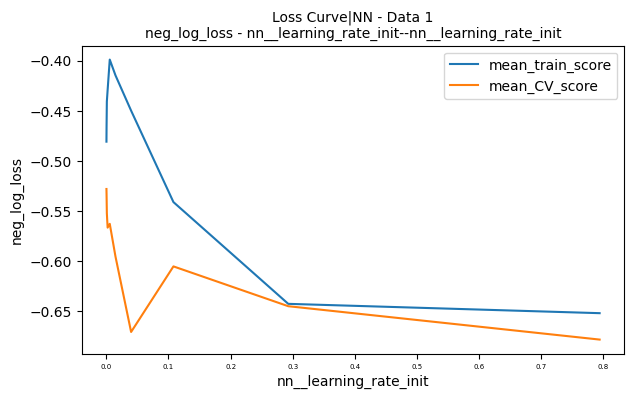

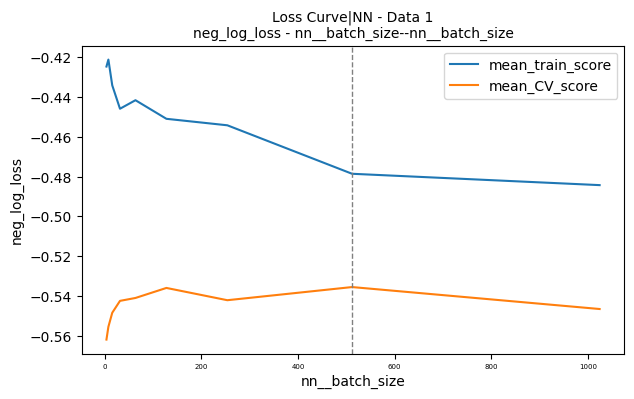

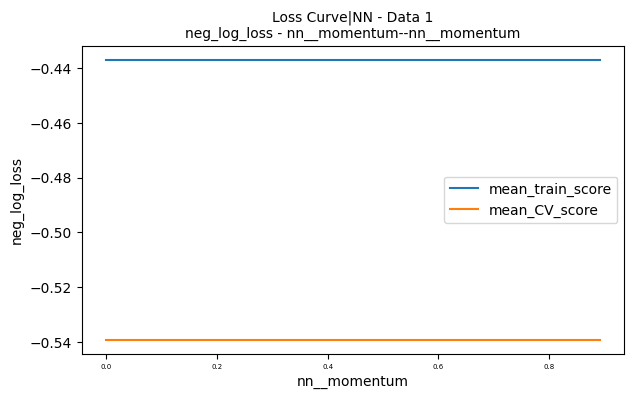

In [35]:

#NNC??



for i in NN_all_hyps_curves_1:

    selected_i = list(i[0].keys())[0]
    
    NN_1_config = i#[0][selected_i]
    
    dataset_1.ADA['NN_test'][selected_i] = dict({})
    
    print('----------------',{selected_i:NN_1_config})
    
    
    (dataset_1.ADA['NN_test'][selected_i]['loss_curve_GS'],
      dataset_1.ADA['NN_test'][selected_i]['GS_list'],
      dataset_1.ADA['NN_test'][selected_i]['DF_list']) = loss_curve(


             GS=GS, 
             model=NN_pipe,
             X_train=dataset_1.X_train,
             y_train=dataset_1.y_train,
             algorithm='NN',
             data_set='Data 1',
             misc='-'+selected_i,
             parameters =NN_1_config ,
             GS_params = NN_1_GS_params,

             plot_config = dict(logx =False),
             #ylim=[dict(ymax=None,ymin=None)]

               )  
    
    
#{'best_score': -0.07266282449542996,
# 'best_params': {'nn__batch_size': 16,
# 'nn__hidden_layer_sizes': (64,),
# 'nn__learning_rate_init': 0.031622775,
# 'nn__momentum': 1e-04}}
#


In [36]:
dataset_1.save()

In [151]:
NN_all_hyps_curves_all_1= {'nn__hidden_layer_sizes':[
                        (16,),
                        (32,), (64,),(32,32),(64,32)
                       
                        
                        #(128,64,32,),
                        ]
 
                     ,'nn__learning_rate_init' : np.logspace(-4,-1,10).astype(np.float32)
                     ,'nn__batch_size': [512]
                     ,'nn__momentum' : [0]}
                    




#for i in NN_all_hyps_curves:
#    
#    NN_all_hyps_curves_all.update(i[0])
#    
#    
#    
#NN_all_hyps_curves_all

In [39]:
NN_1_GS_params

{'cv': 5, 'n_jobs': -1, 'scoring': 'neg_log_loss', 'return_train_score': True}

In [47]:



dataset_1.ADA['NN_test']['best_model_whole_data'] = GS_get_best_estimator(GS=GS, 
                        model=NN_pipe, 
                                  X_train=dataset_1.X_train,
                                   y_train=dataset_1.y_train,
           parameters =NN_all_hyps_curves_all_1 ,GS_params =NN_1_GS_params
          )

{'best_score': -0.5177993385811673, 'best_params': {'nn__batch_size': 512, 'nn__hidden_layer_sizes': (32, 32), 'nn__learning_rate_init': 0.0021544348, 'nn__momentum': 0}}


In [152]:
test_dataset_1_best_model_nn = GS_get_best_estimator(GS=GS, 
                        model=NN_pipe, 
                                  X_train=dataset_1.X_train,
                                   y_train=dataset_1.y_train,
           parameters =NN_all_hyps_curves_all_1 ,GS_params =NN_1_GS_params
          )

{'best_score': -0.5177993385811673, 'best_params': {'nn__batch_size': 512, 'nn__hidden_layer_sizes': (32, 32), 'nn__learning_rate_init': 0.0021544348, 'nn__momentum': 0}}


In [154]:
dataset_1.ADA['NN_test']['best_model_whole_data'].best_params_

{'nn__batch_size': 512,
 'nn__hidden_layer_sizes': (32, 32),
 'nn__learning_rate_init': 0.0021544348,
 'nn__momentum': 0}

In [48]:
dataset_1.save()

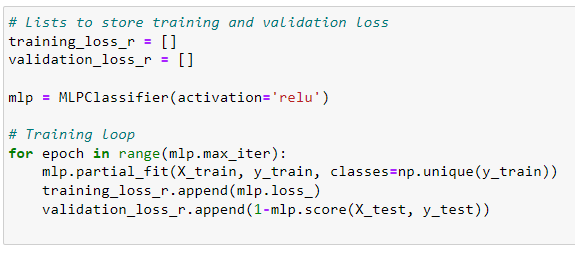

In [219]:

def epoch_learning_curve(model,data_set,scorer = dataset_1.ADA['NN_test']['best_model_whole_data'].scorer_,
                        
                        
                        
                        scoring = 'neg_log_loss',algorithm='random',data_set_name='random',
              
              plot_config = dict(marker= '.',logx =False),misc =''
              
              ,ylim=dict(ymax=None,ymin=None), save = True
                        
                        ):

    
    Training_loss = []
    Validation_loss = []
    
    t = StandardScaler()

    t.fit(data_set.X_train)
    X_train = t.transform(data_set.X_train)
    X_test = t.transform(data_set.X_test)
    
    for i in range(model.max_iter):
        model.partial_fit(X_train,data_set.y_train, classes= np.unique(data_set.y_train))


        Training_loss.append(scorer(model,X_train ,y_true=data_set.y_train))
        Validation_loss.append(scorer(model,X_test ,y_true=data_set.y_test))
    
    over_all_title = ('Learning Curve-Epoch - '+algorithm+' - '+ data_set_name+'-'+
                  scoring+'-'+misc)  
    
    epoch_df = pd.DataFrame({'Training_loss':Training_loss, 'Validation_loss':Validation_loss})
    
    fig,ax = plt.subplots(figsize = [5,2.5])
    ax.ylim = ylim
    epoch_df.plot(y= ['Training_loss','Validation_loss'],**plot_config,title =over_all_title,ax = ax)
    print('val',max(Validation_loss),'epoch',np.where(Validation_loss == max(Validation_loss)))
    ax.axvline(x=np.where(Validation_loss == max(Validation_loss)), color='grey',ls='--',lw=1)
    if save:
        save_loss_curve(fig,over_all_title)
    
    
    return epoch_df

In [156]:
#epochs
epochs = 200

NN_pipe_epochs_1 = NNC(early_stopping=False,
                                   random_state = 1,
                                  
                                  **{ i[4:]:j for i,j in 
                                     dataset_1.ADA['NN_test']['best_model_whole_data'].best_params_.items()}
                                   
                                  ,max_iter = 300
                                  )



In [229]:

NN_pipe_epochs_1 = NNC(early_stopping=False,
                                  
                                  **{i:
                                     dataset_1.ADA['NN_test']['best_model_whole_data'].best_estimator_.steps[1][1].__dict__[i]
                                    for i in ['activation', 'solver', 'alpha', 'batch_size', 'learning_rate',
                                     'learning_rate_init', 'power_t', 'hidden_layer_sizes',
                                     'shuffle', 'random_state', 'tol', 'verbose', 'warm_start',
                                     'momentum', 'nesterovs_momentum',
                                     'validation_fraction'] } 
                                   
                                  ,max_iter = 300
                                  )


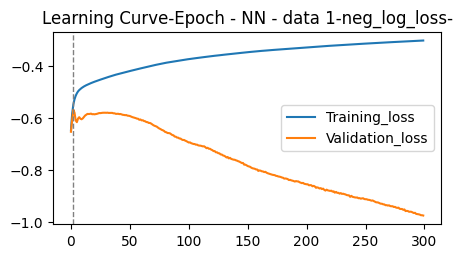

In [233]:
plt.rc('xtick', labelsize=10) 
#plt.figure()
plt.show()

In [236]:
epoch_learning_curve(model = NN_pipe_epochs_1,
                                 data_set = dataset_1,
                                  scorer = dataset_1.ADA['NN_test']['best_model_whole_data'].scorer_,
                                                                        
                                    scoring = 'neg_log_loss',algorithm='NN',data_set_name='data 1',
                                                                        
                                                                        plot_config = dict(logx =False)
                                 )

val -1.3823151334470718 epoch (array([0]),)


,Training_loss,Validation_loss
0,-0.245083,-1.382315
1,-0.244836,-1.385957
2,-0.244626,-1.388429
3,-0.244546,-1.387571
4,-0.244440,-1.388694
...,...,...
295,-0.214829,-1.666703
296,-0.214259,-1.664806
297,-0.214609,-1.664638
298,-0.214158,-1.666489


val -0.5676209539170644 epoch (array([2], dtype=int64),)


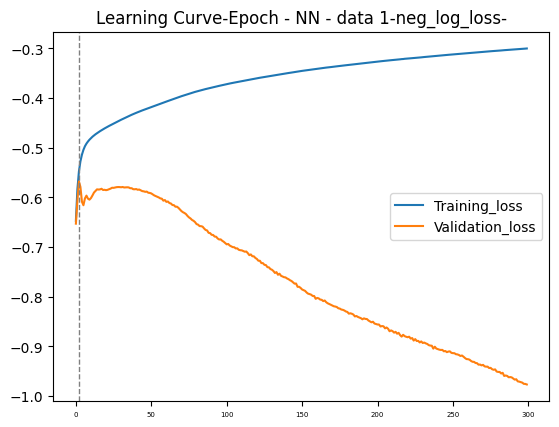

In [154]:



dataset_1.ADA['NN_test']['learning_curve_epoch'] = epoch_learning_curve(model = NN_pipe_epochs_1,
                                 data_set = dataset_1,
                                  scorer = dataset_1.ADA['NN_test']['best_model_whole_data'].scorer_,
                                                                        
                                    scoring = 'neg_log_loss',algorithm='NN',data_set_name='data 1',
                                                                        
                                                                        plot_config = dict(logx =False)
                                 )
#dataset_1.ADA['NN_test']['best_model_whole_data'].best_estimator_.named_steps['nn'].loss_curve_

In [155]:
dataset_1.save()

In [140]:
dataset_2.ADA['NN_test']['best_model_whole_data'].best_params_

{'nn__batch_size': 16,
 'nn__hidden_layer_sizes': (64,),
 'nn__learning_rate_init': 0.031622775,
 'nn__momentum': 1e-04}

In [237]:
#epochs
epochs = 200

NN_pipe_epochs_2 = NNC(early_stopping=False,
                                   random_state = 1,
                                  
                                  **{'batch_size': 16,
                                 'hidden_layer_sizes': (64,),
                                 'learning_rate_init': 0.01,
                                 'momentum': 1e-04}
                                   
                                  ,max_iter = 1000
                                  )


dataset_2.ADA['NN_test']['learning_curve_epoch_2'] = epoch_learning_curve(model = NN_pipe_epochs_2,
                                 data_set = dataset_2,
                                  scorer = dataset_2.ADA['NN_test']['best_model_whole_data'].scorer_,
                                                                        
                                    scoring = 'neg_log_loss',algorithm='NN_',data_set_name='data 2',
                                                                        
                                                                        plot_config = dict(logx =False)
                                 )
#dataset_1.ADA['NN_test']['best_model_whole_data'].best_estimator_.named_steps['nn'].loss_curve_

val -0.053640946945039 epoch (array([130]),)


In [146]:
#dataset_2.ADA['NN_test']['learning_curve_epoch_2'].iloc[:50]

In [153]:
dataset_2.save()

In [176]:
np.linspace(0.1, 1.0, 20)

array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])

In [172]:
#plot_learning_curve??

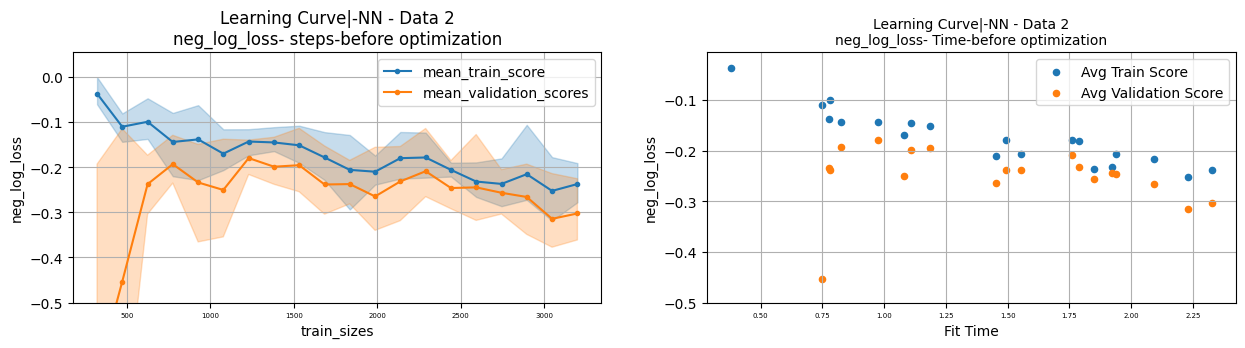

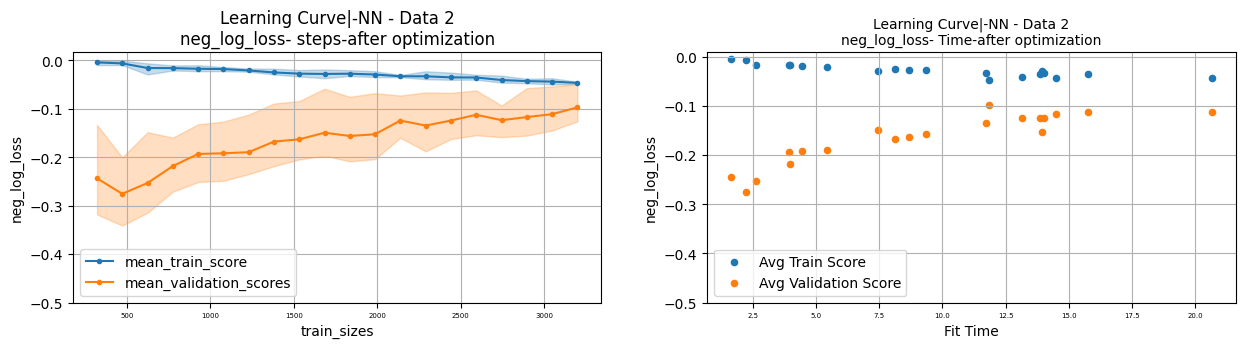

In [177]:


learning_curve_config_NN_2 = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=-1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)


NN_pipe_epochs_2_before_optim = NNC(early_stopping=False,
                                   random_state = 1,
                                  
                                  **{'batch_size': 16,
                                 'hidden_layer_sizes': (16,),
                                 'learning_rate_init': 0.5,
                                 'momentum': 1e-04}
                                   
                                  ,max_iter = 130
                                  )




NN_pipe_epochs_2_after_optim = NNC(early_stopping=False,
                                   random_state = 1,
                                  
                                  **{'batch_size': 16,
                                 'hidden_layer_sizes': (64,),
                                 'learning_rate_init': 0.01,
                                 'momentum': 1e-04}
                                   
                                  ,max_iter = 130
                                  )






dataset_2.ADA['NN_test']['learning_curve'] = {
    
    
    
                'bf_opt':plot_learning_curve( X=knn_X_train_2,
                     y=dataset_2.y_train, 
                    model = NN_pipe_epochs_2_before_optim,
                    learning_curve_config=learning_curve_config_NN_2,
                    algorithm='-NN',
                    data_set='Data 2',misc ='-before optimization',ylim=dict(ymax=None,ymin=-0.5),
                                             
                                             plot_config = {'grid' : True}
                                             
                   ),
    
                'af_opt': plot_learning_curve( X=knn_X_train_2,
                     y=dataset_2.y_train, 
                    model = NN_pipe_epochs_2_after_optim,
                    learning_curve_config=learning_curve_config_NN_2,
                    algorithm='-NN',
                    data_set='Data 2',misc ='-after optimization',ylim=dict(ymax=None,ymin=-0.5),
                                               plot_config = {'grid' : True}
                   )
    
    
                    }

In [178]:
dataset_2.save()

In [179]:
dataset_1.ADA['NN_test']['best_model_whole_data'].best_params_

{'nn__batch_size': 512,
 'nn__hidden_layer_sizes': (32, 32),
 'nn__learning_rate_init': 0.0021544348,
 'nn__momentum': 0}

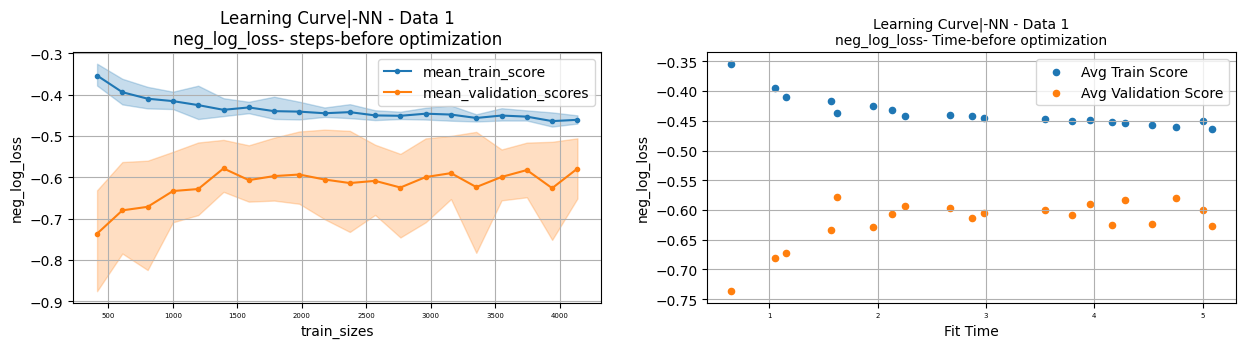

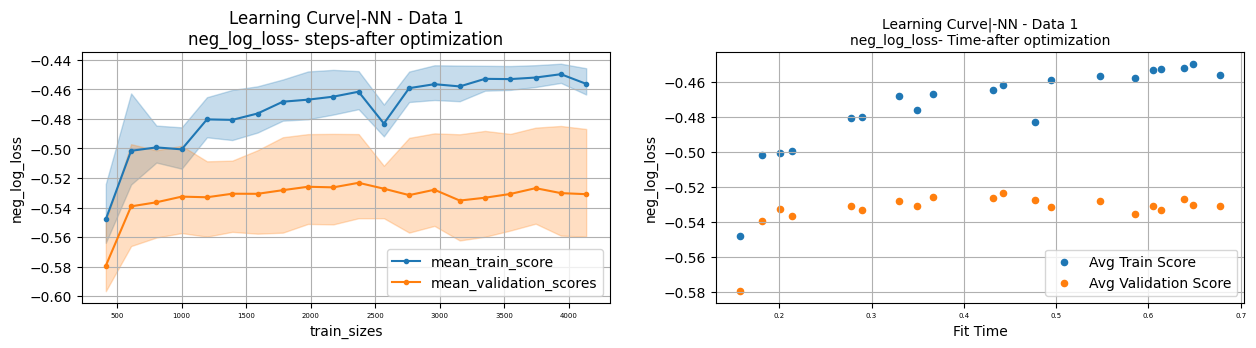

In [184]:


learning_curve_config_NN_1 = dict(cv=5, 
                            train_sizes=np.linspace(0.1, 1.0, 20),
                         n_jobs=-1,return_times =True,shuffle=True,
                        scoring = 'neg_log_loss',
                        random_state = 1)


NN_pipe_epochs_1_before_optim = NNC(early_stopping=False,
                                   random_state = 1,
                                  
                                  **{'batch_size': 16,
                                 'hidden_layer_sizes': (16,),
                                 'learning_rate_init': 0.03,
                                 'momentum': 1e-04}
                                   
                                  ,max_iter = 25
                                  )




NN_pipe_epochs_1_after_optim = NNC(early_stopping=False,
                                   random_state = 1,
                                  
                                  **{'batch_size': 512,
                                 'hidden_layer_sizes': (32, 32),
                                 'learning_rate_init': 0.0021544348,
                                 'momentum': 0}
                                   
                                  ,max_iter = 25
                                  )






dataset_1.ADA['NN_test']['learning_curve'] = {
    
    
    
                'bf_opt':plot_learning_curve( X=knn_X_train,
                     y=dataset_1.y_train, 
                    model = NN_pipe_epochs_1_before_optim,
                    learning_curve_config=learning_curve_config_NN_1,
                    algorithm='-NN',
                    data_set='Data 1',misc ='-before optimization',ylim=dict(ymax=None,ymin=None),plot_config = {'grid' : True}
                   ),
    
                'af_opt': plot_learning_curve( X=knn_X_train,
                     y=dataset_1.y_train, 
                    model = NN_pipe_epochs_1_after_optim,
                    learning_curve_config=learning_curve_config_NN_1,
                    algorithm='-NN',
                    data_set='Data 1',misc ='-after optimization',ylim=dict(ymax=None,ymin=None),plot_config = {'grid' : True}
                   )
    
    
                    }

In [185]:
dataset_1.save()

# testing accuracy

### Data 1

In [176]:
scorer_for_testing = dataset_1.ADA['DT']['best_model_whole_data'].scorer_

In [181]:
dataset_1.ADA.keys()

dict_keys(['DT', 'Adaboost_DT', 'SVC', 'KNN', 'NN_test'])

In [180]:
dataset_1.ADA['DT']['best_test_accuracy'] = scorer_for_testing(
    dataset_1.ADA['DT']['best_model_whole_data'].best_estimator_,
    dataset_1.X_test,
    dataset_1.y_test)

print('DT-data1 NLL',dataset_1.ADA['DT']['best_test_accuracy'])

DT-data1 NLL -0.9002324243549074


In [182]:
dataset_1.ADA['Adaboost_DT']['best_test_accuracy'] = scorer_for_testing(
    dataset_1.ADA['Adaboost_DT']['best_model_whole_data'].best_estimator_,
    dataset_1.X_test,
    dataset_1.y_test)

print('Adaboost_DT-data1 NLL',dataset_1.ADA['Adaboost_DT']['best_test_accuracy'])

Adaboost_DT-data1 NLL -0.6038995350607284


In [183]:
dataset_1.ADA['SVC']['best_test_accuracy'] = scorer_for_testing(
    dataset_1.ADA['SVC']['best_model_whole_data'].best_estimator_,
    dataset_1.X_test,
    dataset_1.y_test)

print('SVC-data1 NLL',dataset_1.ADA['SVC']['best_test_accuracy'])

SVC-data1 NLL -0.6389114223830076


In [195]:
scalar_1 =  StandardScaler()
scalar_1.fit(dataset_1.X_train)

dataset_1.ADA['KNN']['best_test_accuracy'] = scorer_for_testing(
    dataset_1.ADA['KNN']['best_model_whole_data'].best_estimator_,
    scalar_1.transform(dataset_1.X_test),
    dataset_1.y_test)

print('KNN-data1 NLL',dataset_1.ADA['KNN']['best_test_accuracy'])

KNN-data1 NLL -0.6338992683539375


In [185]:
dataset_1.ADA['NN_test']['best_test_accuracy'] = scorer_for_testing(
    dataset_1.ADA['NN_test']['best_model_whole_data'].best_estimator_,
    dataset_1.X_test,
    dataset_1.y_test)

print('NN_test-data1 NLL',dataset_1.ADA['NN_test']['best_test_accuracy'])

NN_test-data1 NLL -0.6172947817967808


In [199]:
dataset_1.save()

### Data 2

In [186]:
scorer_for_testing = dataset_2.ADA['DT']['best_model_whole_data'].scorer_

In [187]:
dataset_2.ADA['DT']['best_test_accuracy'] = scorer_for_testing(
    dataset_2.ADA['DT']['best_model_whole_data'].best_estimator_,
    dataset_2.X_test,
    dataset_2.y_test)

print('DT-data1 NLL',dataset_2.ADA['DT']['best_test_accuracy'])

DT-data1 NLL -0.06204192490396057


In [188]:
dataset_2.ADA['Adaboost_DT']['best_test_accuracy'] = scorer_for_testing(
    dataset_2.ADA['Adaboost_DT']['best_model_whole_data'].best_estimator_,
    dataset_2.X_test,
    dataset_2.y_test)

print('Adaboost_DT-data1 NLL',dataset_2.ADA['Adaboost_DT']['best_test_accuracy'])

Adaboost_DT-data1 NLL -0.05774543300343662


In [189]:
dataset_2.ADA['SVC']['best_test_accuracy'] = scorer_for_testing(
    dataset_2.ADA['SVC']['best_model_whole_data'].best_estimator_,
    dataset_2.X_test,
    dataset_2.y_test)

print('SVC-data1 NLL',dataset_2.ADA['SVC']['best_test_accuracy'])

SVC-data1 NLL -0.055899591254092926


In [193]:

scalar_2 =  StandardScaler()
scalar_2.fit(dataset_2.X_train)

dataset_2.ADA['KNN']['best_test_accuracy'] = scorer_for_testing(
    dataset_2.ADA['KNN']['best_model_whole_data'].best_estimator_,
    scalar_2.transform(dataset_2.X_test),
    dataset_2.y_test)

print('KNN-data1 NLL',dataset_2.ADA['KNN']['best_test_accuracy'])

KNN-data1 NLL -0.07103212691804704


In [197]:
dataset_2.ADA['NN_test']['best_test_accuracy'] = scorer_for_testing(
    dataset_2.ADA['NN_test']['best_model_whole_data'].best_estimator_,
    dataset_2.X_test,
    dataset_2.y_test)

print('NN_test-data1 NLL',dataset_2.ADA['NN_test']['best_test_accuracy'])

NN_test-data1 NLL -0.06621322068858951


In [198]:
dataset_2.save()

In [210]:
from  sklearn.metrics import log_loss as ll_

#ll(y_true, y_pred, as 

In [213]:
ll_(dataset_1.ADA['Adaboost_DT']['best_model_whole_data'].best_estimator_.predict(
dataset_1.X_train
), dataset_1.y_train.values)

11.021054767343289

In [214]:
ll_(dataset_2.ADA['Adaboost_DT']['best_model_whole_data'].best_estimator_.predict(
dataset_2.X_train
), dataset_2.y_train.values)

0.46616473622218396